# NY Flight Prediction

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import bokeh as bkh
import matplotlib.pyplot as plt
from bokeh.io import output_file, show,output_notebook
from bokeh.palettes import Category20c
from bokeh.plotting import figure
from math import pi
from bokeh.transform import cumsum
output_file("carrier_pie.html")
output_notebook()

Loading BokehJS ...

In [2]:
NYF_data=pd.read_csv('Dataset/flight_data.csv',parse_dates=[['year','month','day']])

In [3]:
NYF_data=NYF_data.rename(columns={"year_month_day": "Travel_Date"})

In [4]:
NYF_data.head()

,Travel_Date,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013-01-01,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,01-01-2013 05:00
1,2013-01-01,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,01-01-2013 05:00
2,2013-01-01,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,01-01-2013 05:00
3,2013-01-01,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,01-01-2013 05:00
4,2013-01-01,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,01-01-2013 06:00


In [5]:
NYF_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336776 entries, 0 to 336775
Data columns (total 17 columns):
Travel_Date       336776 non-null datetime64[ns]
dep_time          328521 non-null float64
sched_dep_time    336776 non-null int64
dep_delay         328521 non-null float64
arr_time          328063 non-null float64
sched_arr_time    336776 non-null int64
arr_delay         327346 non-null float64
carrier           336776 non-null object
flight            336776 non-null int64
tailnum           334264 non-null object
origin            336776 non-null object
dest              336776 non-null object
air_time          327346 non-null float64
distance          336776 non-null int64
hour              336776 non-null int64
minute            336776 non-null int64
time_hour         336776 non-null object
dtypes: datetime64[ns](1), float64(5), int64(6), object(5)
memory usage: 43.7+ MB


# Departure time delay and arrival time delay missing value treatment

In [6]:
origin_carrier_grp = np.round(NYF_data.groupby(['origin','dest','carrier']).mean(),0)
origin_carrier_grp

dep_time  sched_dep_time  dep_delay  arr_time  \
origin dest carrier                                                  
EWR    ALB  EV         1627.0          1610.0       24.0    1702.0   
       ANC  UA         1635.0          1618.0       13.0    1968.0   
       ATL  9E          897.0           922.0       -6.0    1150.0   
            DL         1242.0          1231.0       12.0    1466.0   
            EV         1349.0          1335.0       22.0    1538.0   
            UA         1241.0          1212.0       16.0    1485.0   
       AUS  UA         1627.0          1603.0       15.0    1703.0   
            WN          987.0           980.0        4.0    1285.0   
       AVL  EV         1183.0          1176.0        9.0    1380.0   
       BDL  EV         1483.0          1493.0       18.0    1546.0   
            UA         1929.0          2229.0       26.0    1673.0   
       BNA  EV         1388.0          1368.0       21.0    1511.0   
            WN         1008.0          1003.0        8.0    1132.0   
       BOS  B6         1285.0          1280.0       12.0    1369.0   
            EV         1066.0          1058.0        6.0    1174.0   
            UA         1451.0          1433.0       13.0    1531.0   
       BQN  UA         2062.0          2044.0       24.0     126.0   
       BTV  EV         1339.0          1346.0       18.0    1356.0   
       BUF  EV         1133.0          1119.0       14.0    1235.0   
       BWI  EV         1567.0          1567.0       23.0    1568.0   
            WN         1242.0          1224.0       10.0    1343.0   
       BZN  UA          840.0           821.0       11.0    1113.0   
       CAE  EV         1882.0          1822.0       36.0    2064.0   
       CHS  EV         1333.0          1318.0       18.0    1502.0   
            UA         1254.0          1259.0       -5.0    1446.0   
       CLE  EV         1075.0          1084.0        8.0    1224.0   
            UA         1571.0          1554.0       12.0    1714.0   
       CLT  EV         1416.0          1406.0       23.0    1517.0   
            UA         1084.0          1106.0       -2.0    1322.0   
            US         1102.0          1106.0        3.0    1286.0   
...                       ...             ...        ...       ...   
LGA    RDU  9E         1469.0          1451.0        9.0    1650.0   
            EV         1564.0          1543.0       17.0    1742.0   
            MQ         1416.0          1418.0        8.0    1564.0   
       RIC  9E         1433.0          1402.0       17.0    1605.0   
            EV         1501.0          1518.0       17.0    1564.0   
       ROC  9E         1438.0          1516.0       -4.0    1582.0   
            EV         1328.0          1305.0       13.0    1447.0   
       RSW  9E          812.0           807.0        6.0    1133.0   
            B6         1180.0          1164.0       10.0    1495.0   
            DL         1482.0          1465.0       10.0    1717.0   
       SAV  EV          981.0           975.0        3.0    1211.0   
       SBN  EV         1952.0          1894.0       31.0    2168.0   
       SDF  9E          946.0           935.0        4.0    1186.0   
       SRQ  9E         1114.0          1091.0       15.0    1426.0   
            B6         1346.0          1328.0       10.0    1653.0   
            DL         1058.0          1045.0        6.0    1368.0   
            EV          882.0           864.0        7.0    1185.0   
       STL  AA         1404.0          1399.0        4.0    1576.0   
            EV          884.0           889.0       -4.0    1052.0   
            MQ         1347.0          1345.0       10.0    1533.0   
            WN         1219.0          1197.0       16.0    1382.0   
       SYR  9E         1961.0          2001.0       15.0    1843.0   
            EV         1511.0          1521.0       22.0    1496.0   
       TPA  B6         1183.0          1162.0       14.0    1482.0   
            DL         1347.0  

In [7]:
def dep_delay_na(org, dest, carr):
    try:
        mns= origin_carrier_grp.dep_delay[org][dest][carr]    
        indexed=NYF_data[NYF_data.origin==org][NYF_data.dest==dest][NYF_data.carrier==carr].loc[NYF_data['dep_delay'].isnull(),'dep_delay'].index
        for i in indexed:
            if np.isnan(mns):
                NYF_data.loc[i,'dep_delay']=0
            else:
                NYF_data.loc[i,'dep_delay']=mns
    except:        
        print('Combination of flight with Origin {} Destination {} and carrier {} were not found'.format(org, dest, carr))

In [8]:
def arr_delay_na(org, dest, carr):
    try:
        mns= origin_carrier_grp.arr_delay[org][dest][carr]    
        indexed=NYF_data[NYF_data.origin==org][NYF_data.dest==dest][NYF_data.carrier==carr].loc[NYF_data['arr_delay'].isnull(),'arr_delay'].index
        for i in indexed:
            if np.isnan(mns):
                NYF_data.loc[i,'arr_delay']=0
            else:
                NYF_data.loc[i,'arr_delay']=mns
    except:
        print('Combination of flight with Origin {} Destination {} and carrier {} were not found'.format(org, dest, carr))

In [9]:
NYF_data.carrier.unique()

array(['UA', 'AA', 'B6', 'DL', 'EV', 'MQ', 'US', 'WN', 'VX', 'FL', 'AS',
       '9E', 'F9', 'HA', 'YV', 'OO'], dtype=object)

In [10]:
NYF_data.origin.unique()

array(['EWR', 'LGA', 'JFK'], dtype=object)

In [11]:
NYF_data.dest.unique()

array(['IAH', 'MIA', 'BQN', 'ATL', 'ORD', 'FLL', 'IAD', 'MCO', 'PBI',
       'TPA', 'LAX', 'SFO', 'DFW', 'BOS', 'LAS', 'MSP', 'DTW', 'RSW',
       'SJU', 'PHX', 'BWI', 'CLT', 'BUF', 'DEN', 'SNA', 'MSY', 'SLC',
       'XNA', 'MKE', 'SEA', 'ROC', 'SYR', 'SRQ', 'RDU', 'CMH', 'JAX',
       'CHS', 'MEM', 'PIT', 'SAN', 'DCA', 'CLE', 'STL', 'MYR', 'JAC',
       'MDW', 'HNL', 'BNA', 'AUS', 'BTV', 'PHL', 'STT', 'EGE', 'AVL',
       'PWM', 'IND', 'SAV', 'CAK', 'HOU', 'LGB', 'DAY', 'ALB', 'BDL',
       'MHT', 'MSN', 'GSO', 'CVG', 'BUR', 'RIC', 'GSP', 'GRR', 'MCI',
       'ORF', 'SAT', 'SDF', 'PDX', 'SJC', 'OMA', 'CRW', 'OAK', 'SMF',
       'TUL', 'TYS', 'OKC', 'PVD', 'DSM', 'PSE', 'BHM', 'CAE', 'HDN',
       'BZN', 'MTJ', 'EYW', 'PSP', 'ACK', 'BGR', 'ABQ', 'ILM', 'MVY',
       'SBN', 'LEX', 'CHO', 'TVC', 'ANC', 'LGA'], dtype=object)

In [12]:
for i in NYF_data.origin.unique():
    for j in NYF_data.dest.unique():
        for k in NYF_data.carrier.unique():
            dep_delay_na(i,j,k)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


Combination of flight with Origin EWR Destination IAH and carrier AA were not found
Combination of flight with Origin EWR Destination IAH and carrier B6 were not found
Combination of flight with Origin EWR Destination IAH and carrier DL were not found
Combination of flight with Origin EWR Destination IAH and carrier EV were not found
Combination of flight with Origin EWR Destination IAH and carrier MQ were not found
Combination of flight with Origin EWR Destination IAH and carrier US were not found
Combination of flight with Origin EWR Destination IAH and carrier WN were not found
Combination of flight with Origin EWR Destination IAH and carrier VX were not found
Combination of flight with Origin EWR Destination IAH and carrier FL were not found
Combination of flight with Origin EWR Destination IAH and carrier AS were not found
Combination of flight with Origin EWR Destination IAH and carrier 9E were not found
Combination of flight with Origin EWR Destination IAH and carrier F9 were no

Combination of flight with Origin EWR Destination MCO and carrier DL were not found
Combination of flight with Origin EWR Destination MCO and carrier EV were not found
Combination of flight with Origin EWR Destination MCO and carrier MQ were not found
Combination of flight with Origin EWR Destination MCO and carrier US were not found
Combination of flight with Origin EWR Destination MCO and carrier WN were not found
Combination of flight with Origin EWR Destination MCO and carrier VX were not found
Combination of flight with Origin EWR Destination MCO and carrier FL were not found
Combination of flight with Origin EWR Destination MCO and carrier AS were not found
Combination of flight with Origin EWR Destination MCO and carrier 9E were not found
Combination of flight with Origin EWR Destination MCO and carrier F9 were not found
Combination of flight with Origin EWR Destination MCO and carrier HA were not found
Combination of flight with Origin EWR Destination MCO and carrier YV were no

Combination of flight with Origin EWR Destination MSP and carrier MQ were not found
Combination of flight with Origin EWR Destination MSP and carrier US were not found
Combination of flight with Origin EWR Destination MSP and carrier WN were not found
Combination of flight with Origin EWR Destination MSP and carrier VX were not found
Combination of flight with Origin EWR Destination MSP and carrier FL were not found
Combination of flight with Origin EWR Destination MSP and carrier AS were not found
Combination of flight with Origin EWR Destination MSP and carrier F9 were not found
Combination of flight with Origin EWR Destination MSP and carrier HA were not found
Combination of flight with Origin EWR Destination MSP and carrier YV were not found
Combination of flight with Origin EWR Destination DTW and carrier AA were not found
Combination of flight with Origin EWR Destination DTW and carrier B6 were not found
Combination of flight with Origin EWR Destination DTW and carrier MQ were no

Combination of flight with Origin EWR Destination DEN and carrier AA were not found
Combination of flight with Origin EWR Destination DEN and carrier B6 were not found
Combination of flight with Origin EWR Destination DEN and carrier DL were not found
Combination of flight with Origin EWR Destination DEN and carrier EV were not found
Combination of flight with Origin EWR Destination DEN and carrier MQ were not found
Combination of flight with Origin EWR Destination DEN and carrier US were not found
Combination of flight with Origin EWR Destination DEN and carrier VX were not found
Combination of flight with Origin EWR Destination DEN and carrier FL were not found
Combination of flight with Origin EWR Destination DEN and carrier AS were not found
Combination of flight with Origin EWR Destination DEN and carrier 9E were not found
Combination of flight with Origin EWR Destination DEN and carrier F9 were not found
Combination of flight with Origin EWR Destination DEN and carrier HA were no

Combination of flight with Origin EWR Destination ROC and carrier MQ were not found
Combination of flight with Origin EWR Destination ROC and carrier US were not found
Combination of flight with Origin EWR Destination ROC and carrier WN were not found
Combination of flight with Origin EWR Destination ROC and carrier VX were not found
Combination of flight with Origin EWR Destination ROC and carrier FL were not found
Combination of flight with Origin EWR Destination ROC and carrier AS were not found
Combination of flight with Origin EWR Destination ROC and carrier 9E were not found
Combination of flight with Origin EWR Destination ROC and carrier F9 were not found
Combination of flight with Origin EWR Destination ROC and carrier HA were not found
Combination of flight with Origin EWR Destination ROC and carrier YV were not found
Combination of flight with Origin EWR Destination ROC and carrier OO were not found
Combination of flight with Origin EWR Destination SYR and carrier UA were no

Combination of flight with Origin EWR Destination MEM and carrier MQ were not found
Combination of flight with Origin EWR Destination MEM and carrier US were not found
Combination of flight with Origin EWR Destination MEM and carrier WN were not found
Combination of flight with Origin EWR Destination MEM and carrier VX were not found
Combination of flight with Origin EWR Destination MEM and carrier FL were not found
Combination of flight with Origin EWR Destination MEM and carrier AS were not found
Combination of flight with Origin EWR Destination MEM and carrier 9E were not found
Combination of flight with Origin EWR Destination MEM and carrier F9 were not found
Combination of flight with Origin EWR Destination MEM and carrier HA were not found
Combination of flight with Origin EWR Destination MEM and carrier YV were not found
Combination of flight with Origin EWR Destination MEM and carrier OO were not found
Combination of flight with Origin EWR Destination PIT and carrier AA were no

Combination of flight with Origin EWR Destination MDW and carrier VX were not found
Combination of flight with Origin EWR Destination MDW and carrier FL were not found
Combination of flight with Origin EWR Destination MDW and carrier AS were not found
Combination of flight with Origin EWR Destination MDW and carrier 9E were not found
Combination of flight with Origin EWR Destination MDW and carrier F9 were not found
Combination of flight with Origin EWR Destination MDW and carrier HA were not found
Combination of flight with Origin EWR Destination MDW and carrier YV were not found
Combination of flight with Origin EWR Destination MDW and carrier OO were not found
Combination of flight with Origin EWR Destination HNL and carrier AA were not found
Combination of flight with Origin EWR Destination HNL and carrier B6 were not found
Combination of flight with Origin EWR Destination HNL and carrier DL were not found
Combination of flight with Origin EWR Destination HNL and carrier EV were no

Combination of flight with Origin EWR Destination EGE and carrier YV were not found
Combination of flight with Origin EWR Destination EGE and carrier OO were not found
Combination of flight with Origin EWR Destination AVL and carrier UA were not found
Combination of flight with Origin EWR Destination AVL and carrier AA were not found
Combination of flight with Origin EWR Destination AVL and carrier B6 were not found
Combination of flight with Origin EWR Destination AVL and carrier DL were not found
Combination of flight with Origin EWR Destination AVL and carrier MQ were not found
Combination of flight with Origin EWR Destination AVL and carrier US were not found
Combination of flight with Origin EWR Destination AVL and carrier WN were not found
Combination of flight with Origin EWR Destination AVL and carrier VX were not found
Combination of flight with Origin EWR Destination AVL and carrier FL were not found
Combination of flight with Origin EWR Destination AVL and carrier AS were no

Combination of flight with Origin EWR Destination DAY and carrier MQ were not found
Combination of flight with Origin EWR Destination DAY and carrier US were not found
Combination of flight with Origin EWR Destination DAY and carrier WN were not found
Combination of flight with Origin EWR Destination DAY and carrier VX were not found
Combination of flight with Origin EWR Destination DAY and carrier FL were not found
Combination of flight with Origin EWR Destination DAY and carrier AS were not found
Combination of flight with Origin EWR Destination DAY and carrier 9E were not found
Combination of flight with Origin EWR Destination DAY and carrier F9 were not found
Combination of flight with Origin EWR Destination DAY and carrier HA were not found
Combination of flight with Origin EWR Destination DAY and carrier YV were not found
Combination of flight with Origin EWR Destination DAY and carrier OO were not found
Combination of flight with Origin EWR Destination ALB and carrier UA were no

Combination of flight with Origin EWR Destination RIC and carrier MQ were not found
Combination of flight with Origin EWR Destination RIC and carrier US were not found
Combination of flight with Origin EWR Destination RIC and carrier WN were not found
Combination of flight with Origin EWR Destination RIC and carrier VX were not found
Combination of flight with Origin EWR Destination RIC and carrier FL were not found
Combination of flight with Origin EWR Destination RIC and carrier AS were not found
Combination of flight with Origin EWR Destination RIC and carrier 9E were not found
Combination of flight with Origin EWR Destination RIC and carrier F9 were not found
Combination of flight with Origin EWR Destination RIC and carrier HA were not found
Combination of flight with Origin EWR Destination RIC and carrier YV were not found
Combination of flight with Origin EWR Destination RIC and carrier OO were not found
Combination of flight with Origin EWR Destination GSP and carrier UA were no

Combination of flight with Origin EWR Destination PDX and carrier OO were not found
Combination of flight with Origin EWR Destination SJC and carrier UA were not found
Combination of flight with Origin EWR Destination SJC and carrier AA were not found
Combination of flight with Origin EWR Destination SJC and carrier B6 were not found
Combination of flight with Origin EWR Destination SJC and carrier DL were not found
Combination of flight with Origin EWR Destination SJC and carrier EV were not found
Combination of flight with Origin EWR Destination SJC and carrier MQ were not found
Combination of flight with Origin EWR Destination SJC and carrier US were not found
Combination of flight with Origin EWR Destination SJC and carrier WN were not found
Combination of flight with Origin EWR Destination SJC and carrier VX were not found
Combination of flight with Origin EWR Destination SJC and carrier FL were not found
Combination of flight with Origin EWR Destination SJC and carrier AS were no

Combination of flight with Origin EWR Destination TYS and carrier MQ were not found
Combination of flight with Origin EWR Destination TYS and carrier US were not found
Combination of flight with Origin EWR Destination TYS and carrier WN were not found
Combination of flight with Origin EWR Destination TYS and carrier VX were not found
Combination of flight with Origin EWR Destination TYS and carrier FL were not found
Combination of flight with Origin EWR Destination TYS and carrier AS were not found
Combination of flight with Origin EWR Destination TYS and carrier 9E were not found
Combination of flight with Origin EWR Destination TYS and carrier F9 were not found
Combination of flight with Origin EWR Destination TYS and carrier HA were not found
Combination of flight with Origin EWR Destination TYS and carrier YV were not found
Combination of flight with Origin EWR Destination TYS and carrier OO were not found
Combination of flight with Origin EWR Destination OKC and carrier UA were no

Combination of flight with Origin EWR Destination BZN and carrier AA were not found
Combination of flight with Origin EWR Destination BZN and carrier B6 were not found
Combination of flight with Origin EWR Destination BZN and carrier DL were not found
Combination of flight with Origin EWR Destination BZN and carrier EV were not found
Combination of flight with Origin EWR Destination BZN and carrier MQ were not found
Combination of flight with Origin EWR Destination BZN and carrier US were not found
Combination of flight with Origin EWR Destination BZN and carrier WN were not found
Combination of flight with Origin EWR Destination BZN and carrier VX were not found
Combination of flight with Origin EWR Destination BZN and carrier FL were not found
Combination of flight with Origin EWR Destination BZN and carrier AS were not found
Combination of flight with Origin EWR Destination BZN and carrier 9E were not found
Combination of flight with Origin EWR Destination BZN and carrier F9 were no

Combination of flight with Origin EWR Destination ILM and carrier UA were not found
Combination of flight with Origin EWR Destination ILM and carrier AA were not found
Combination of flight with Origin EWR Destination ILM and carrier B6 were not found
Combination of flight with Origin EWR Destination ILM and carrier DL were not found
Combination of flight with Origin EWR Destination ILM and carrier EV were not found
Combination of flight with Origin EWR Destination ILM and carrier MQ were not found
Combination of flight with Origin EWR Destination ILM and carrier US were not found
Combination of flight with Origin EWR Destination ILM and carrier WN were not found
Combination of flight with Origin EWR Destination ILM and carrier VX were not found
Combination of flight with Origin EWR Destination ILM and carrier FL were not found
Combination of flight with Origin EWR Destination ILM and carrier AS were not found
Combination of flight with Origin EWR Destination ILM and carrier 9E were no

Combination of flight with Origin EWR Destination LGA and carrier WN were not found
Combination of flight with Origin EWR Destination LGA and carrier VX were not found
Combination of flight with Origin EWR Destination LGA and carrier FL were not found
Combination of flight with Origin EWR Destination LGA and carrier AS were not found
Combination of flight with Origin EWR Destination LGA and carrier 9E were not found
Combination of flight with Origin EWR Destination LGA and carrier F9 were not found
Combination of flight with Origin EWR Destination LGA and carrier HA were not found
Combination of flight with Origin EWR Destination LGA and carrier YV were not found
Combination of flight with Origin EWR Destination LGA and carrier OO were not found
Combination of flight with Origin LGA Destination IAH and carrier AA were not found
Combination of flight with Origin LGA Destination IAH and carrier B6 were not found
Combination of flight with Origin LGA Destination IAH and carrier DL were no

Combination of flight with Origin LGA Destination MCO and carrier UA were not found
Combination of flight with Origin LGA Destination MCO and carrier AA were not found
Combination of flight with Origin LGA Destination MCO and carrier EV were not found
Combination of flight with Origin LGA Destination MCO and carrier MQ were not found
Combination of flight with Origin LGA Destination MCO and carrier US were not found
Combination of flight with Origin LGA Destination MCO and carrier WN were not found
Combination of flight with Origin LGA Destination MCO and carrier VX were not found
Combination of flight with Origin LGA Destination MCO and carrier FL were not found
Combination of flight with Origin LGA Destination MCO and carrier AS were not found
Combination of flight with Origin LGA Destination MCO and carrier 9E were not found
Combination of flight with Origin LGA Destination MCO and carrier F9 were not found
Combination of flight with Origin LGA Destination MCO and carrier HA were no

Combination of flight with Origin LGA Destination MSP and carrier EV were not found
Combination of flight with Origin LGA Destination MSP and carrier US were not found
Combination of flight with Origin LGA Destination MSP and carrier WN were not found
Combination of flight with Origin LGA Destination MSP and carrier VX were not found
Combination of flight with Origin LGA Destination MSP and carrier FL were not found
Combination of flight with Origin LGA Destination MSP and carrier AS were not found
Combination of flight with Origin LGA Destination MSP and carrier F9 were not found
Combination of flight with Origin LGA Destination MSP and carrier HA were not found
Combination of flight with Origin LGA Destination MSP and carrier YV were not found
Combination of flight with Origin LGA Destination MSP and carrier OO were not found
Combination of flight with Origin LGA Destination DTW and carrier UA were not found
Combination of flight with Origin LGA Destination DTW and carrier AA were no

Combination of flight with Origin LGA Destination DEN and carrier AA were not found
Combination of flight with Origin LGA Destination DEN and carrier B6 were not found
Combination of flight with Origin LGA Destination DEN and carrier EV were not found
Combination of flight with Origin LGA Destination DEN and carrier MQ were not found
Combination of flight with Origin LGA Destination DEN and carrier US were not found
Combination of flight with Origin LGA Destination DEN and carrier VX were not found
Combination of flight with Origin LGA Destination DEN and carrier FL were not found
Combination of flight with Origin LGA Destination DEN and carrier AS were not found
Combination of flight with Origin LGA Destination DEN and carrier 9E were not found
Combination of flight with Origin LGA Destination DEN and carrier HA were not found
Combination of flight with Origin LGA Destination DEN and carrier YV were not found
Combination of flight with Origin LGA Destination DEN and carrier OO were no

Combination of flight with Origin LGA Destination ROC and carrier MQ were not found
Combination of flight with Origin LGA Destination ROC and carrier US were not found
Combination of flight with Origin LGA Destination ROC and carrier WN were not found
Combination of flight with Origin LGA Destination ROC and carrier VX were not found
Combination of flight with Origin LGA Destination ROC and carrier FL were not found
Combination of flight with Origin LGA Destination ROC and carrier AS were not found
Combination of flight with Origin LGA Destination ROC and carrier F9 were not found
Combination of flight with Origin LGA Destination ROC and carrier HA were not found
Combination of flight with Origin LGA Destination ROC and carrier YV were not found
Combination of flight with Origin LGA Destination ROC and carrier OO were not found
Combination of flight with Origin LGA Destination SYR and carrier UA were not found
Combination of flight with Origin LGA Destination SYR and carrier AA were no

Combination of flight with Origin LGA Destination PIT and carrier MQ were not found
Combination of flight with Origin LGA Destination PIT and carrier US were not found
Combination of flight with Origin LGA Destination PIT and carrier WN were not found
Combination of flight with Origin LGA Destination PIT and carrier VX were not found
Combination of flight with Origin LGA Destination PIT and carrier FL were not found
Combination of flight with Origin LGA Destination PIT and carrier AS were not found
Combination of flight with Origin LGA Destination PIT and carrier F9 were not found
Combination of flight with Origin LGA Destination PIT and carrier HA were not found
Combination of flight with Origin LGA Destination PIT and carrier YV were not found
Combination of flight with Origin LGA Destination PIT and carrier OO were not found
Combination of flight with Origin LGA Destination SAN and carrier UA were not found
Combination of flight with Origin LGA Destination SAN and carrier AA were no

Combination of flight with Origin LGA Destination MDW and carrier VX were not found
Combination of flight with Origin LGA Destination MDW and carrier FL were not found
Combination of flight with Origin LGA Destination MDW and carrier AS were not found
Combination of flight with Origin LGA Destination MDW and carrier 9E were not found
Combination of flight with Origin LGA Destination MDW and carrier F9 were not found
Combination of flight with Origin LGA Destination MDW and carrier HA were not found
Combination of flight with Origin LGA Destination MDW and carrier YV were not found
Combination of flight with Origin LGA Destination MDW and carrier OO were not found
Combination of flight with Origin LGA Destination HNL and carrier UA were not found
Combination of flight with Origin LGA Destination HNL and carrier AA were not found
Combination of flight with Origin LGA Destination HNL and carrier B6 were not found
Combination of flight with Origin LGA Destination HNL and carrier DL were no

Combination of flight with Origin LGA Destination AVL and carrier UA were not found
Combination of flight with Origin LGA Destination AVL and carrier AA were not found
Combination of flight with Origin LGA Destination AVL and carrier B6 were not found
Combination of flight with Origin LGA Destination AVL and carrier DL were not found
Combination of flight with Origin LGA Destination AVL and carrier EV were not found
Combination of flight with Origin LGA Destination AVL and carrier MQ were not found
Combination of flight with Origin LGA Destination AVL and carrier US were not found
Combination of flight with Origin LGA Destination AVL and carrier WN were not found
Combination of flight with Origin LGA Destination AVL and carrier VX were not found
Combination of flight with Origin LGA Destination AVL and carrier FL were not found
Combination of flight with Origin LGA Destination AVL and carrier AS were not found
Combination of flight with Origin LGA Destination AVL and carrier F9 were no

Combination of flight with Origin LGA Destination DAY and carrier UA were not found
Combination of flight with Origin LGA Destination DAY and carrier AA were not found
Combination of flight with Origin LGA Destination DAY and carrier B6 were not found
Combination of flight with Origin LGA Destination DAY and carrier DL were not found
Combination of flight with Origin LGA Destination DAY and carrier EV were not found
Combination of flight with Origin LGA Destination DAY and carrier MQ were not found
Combination of flight with Origin LGA Destination DAY and carrier US were not found
Combination of flight with Origin LGA Destination DAY and carrier WN were not found
Combination of flight with Origin LGA Destination DAY and carrier VX were not found
Combination of flight with Origin LGA Destination DAY and carrier FL were not found
Combination of flight with Origin LGA Destination DAY and carrier AS were not found
Combination of flight with Origin LGA Destination DAY and carrier F9 were no

Combination of flight with Origin LGA Destination RIC and carrier UA were not found
Combination of flight with Origin LGA Destination RIC and carrier AA were not found
Combination of flight with Origin LGA Destination RIC and carrier B6 were not found
Combination of flight with Origin LGA Destination RIC and carrier DL were not found
Combination of flight with Origin LGA Destination RIC and carrier MQ were not found
Combination of flight with Origin LGA Destination RIC and carrier US were not found
Combination of flight with Origin LGA Destination RIC and carrier WN were not found
Combination of flight with Origin LGA Destination RIC and carrier VX were not found
Combination of flight with Origin LGA Destination RIC and carrier FL were not found
Combination of flight with Origin LGA Destination RIC and carrier AS were not found
Combination of flight with Origin LGA Destination RIC and carrier F9 were not found
Combination of flight with Origin LGA Destination RIC and carrier HA were no

Combination of flight with Origin LGA Destination OMA and carrier MQ were not found
Combination of flight with Origin LGA Destination OMA and carrier US were not found
Combination of flight with Origin LGA Destination OMA and carrier WN were not found
Combination of flight with Origin LGA Destination OMA and carrier VX were not found
Combination of flight with Origin LGA Destination OMA and carrier FL were not found
Combination of flight with Origin LGA Destination OMA and carrier AS were not found
Combination of flight with Origin LGA Destination OMA and carrier 9E were not found
Combination of flight with Origin LGA Destination OMA and carrier F9 were not found
Combination of flight with Origin LGA Destination OMA and carrier HA were not found
Combination of flight with Origin LGA Destination OMA and carrier YV were not found
Combination of flight with Origin LGA Destination OMA and carrier OO were not found
Combination of flight with Origin LGA Destination CRW and carrier UA were no

Combination of flight with Origin LGA Destination DSM and carrier MQ were not found
Combination of flight with Origin LGA Destination DSM and carrier US were not found
Combination of flight with Origin LGA Destination DSM and carrier WN were not found
Combination of flight with Origin LGA Destination DSM and carrier VX were not found
Combination of flight with Origin LGA Destination DSM and carrier FL were not found
Combination of flight with Origin LGA Destination DSM and carrier AS were not found
Combination of flight with Origin LGA Destination DSM and carrier F9 were not found
Combination of flight with Origin LGA Destination DSM and carrier HA were not found
Combination of flight with Origin LGA Destination DSM and carrier YV were not found
Combination of flight with Origin LGA Destination DSM and carrier OO were not found
Combination of flight with Origin LGA Destination PSE and carrier UA were not found
Combination of flight with Origin LGA Destination PSE and carrier AA were no

Combination of flight with Origin LGA Destination EYW and carrier EV were not found
Combination of flight with Origin LGA Destination EYW and carrier MQ were not found
Combination of flight with Origin LGA Destination EYW and carrier US were not found
Combination of flight with Origin LGA Destination EYW and carrier WN were not found
Combination of flight with Origin LGA Destination EYW and carrier VX were not found
Combination of flight with Origin LGA Destination EYW and carrier FL were not found
Combination of flight with Origin LGA Destination EYW and carrier AS were not found
Combination of flight with Origin LGA Destination EYW and carrier 9E were not found
Combination of flight with Origin LGA Destination EYW and carrier F9 were not found
Combination of flight with Origin LGA Destination EYW and carrier HA were not found
Combination of flight with Origin LGA Destination EYW and carrier YV were not found
Combination of flight with Origin LGA Destination EYW and carrier OO were no

Combination of flight with Origin LGA Destination MVY and carrier YV were not found
Combination of flight with Origin LGA Destination MVY and carrier OO were not found
Combination of flight with Origin LGA Destination SBN and carrier UA were not found
Combination of flight with Origin LGA Destination SBN and carrier AA were not found
Combination of flight with Origin LGA Destination SBN and carrier B6 were not found
Combination of flight with Origin LGA Destination SBN and carrier DL were not found
Combination of flight with Origin LGA Destination SBN and carrier MQ were not found
Combination of flight with Origin LGA Destination SBN and carrier US were not found
Combination of flight with Origin LGA Destination SBN and carrier WN were not found
Combination of flight with Origin LGA Destination SBN and carrier VX were not found
Combination of flight with Origin LGA Destination SBN and carrier FL were not found
Combination of flight with Origin LGA Destination SBN and carrier AS were no

Combination of flight with Origin JFK Destination MIA and carrier B6 were not found
Combination of flight with Origin JFK Destination MIA and carrier EV were not found
Combination of flight with Origin JFK Destination MIA and carrier MQ were not found
Combination of flight with Origin JFK Destination MIA and carrier US were not found
Combination of flight with Origin JFK Destination MIA and carrier WN were not found
Combination of flight with Origin JFK Destination MIA and carrier VX were not found
Combination of flight with Origin JFK Destination MIA and carrier FL were not found
Combination of flight with Origin JFK Destination MIA and carrier AS were not found
Combination of flight with Origin JFK Destination MIA and carrier 9E were not found
Combination of flight with Origin JFK Destination MIA and carrier F9 were not found
Combination of flight with Origin JFK Destination MIA and carrier HA were not found
Combination of flight with Origin JFK Destination MIA and carrier YV were no

Combination of flight with Origin JFK Destination TPA and carrier EV were not found
Combination of flight with Origin JFK Destination TPA and carrier US were not found
Combination of flight with Origin JFK Destination TPA and carrier WN were not found
Combination of flight with Origin JFK Destination TPA and carrier VX were not found
Combination of flight with Origin JFK Destination TPA and carrier FL were not found
Combination of flight with Origin JFK Destination TPA and carrier AS were not found
Combination of flight with Origin JFK Destination TPA and carrier F9 were not found
Combination of flight with Origin JFK Destination TPA and carrier HA were not found
Combination of flight with Origin JFK Destination TPA and carrier YV were not found
Combination of flight with Origin JFK Destination TPA and carrier OO were not found
Combination of flight with Origin JFK Destination LAX and carrier EV were not found
Combination of flight with Origin JFK Destination LAX and carrier MQ were no

Combination of flight with Origin JFK Destination RSW and carrier EV were not found
Combination of flight with Origin JFK Destination RSW and carrier MQ were not found
Combination of flight with Origin JFK Destination RSW and carrier US were not found
Combination of flight with Origin JFK Destination RSW and carrier WN were not found
Combination of flight with Origin JFK Destination RSW and carrier VX were not found
Combination of flight with Origin JFK Destination RSW and carrier FL were not found
Combination of flight with Origin JFK Destination RSW and carrier AS were not found
Combination of flight with Origin JFK Destination RSW and carrier 9E were not found
Combination of flight with Origin JFK Destination RSW and carrier F9 were not found
Combination of flight with Origin JFK Destination RSW and carrier HA were not found
Combination of flight with Origin JFK Destination RSW and carrier YV were not found
Combination of flight with Origin JFK Destination RSW and carrier OO were no

Combination of flight with Origin JFK Destination MSY and carrier EV were not found
Combination of flight with Origin JFK Destination MSY and carrier MQ were not found
Combination of flight with Origin JFK Destination MSY and carrier US were not found
Combination of flight with Origin JFK Destination MSY and carrier WN were not found
Combination of flight with Origin JFK Destination MSY and carrier VX were not found
Combination of flight with Origin JFK Destination MSY and carrier FL were not found
Combination of flight with Origin JFK Destination MSY and carrier AS were not found
Combination of flight with Origin JFK Destination MSY and carrier F9 were not found
Combination of flight with Origin JFK Destination MSY and carrier HA were not found
Combination of flight with Origin JFK Destination MSY and carrier YV were not found
Combination of flight with Origin JFK Destination MSY and carrier OO were not found
Combination of flight with Origin JFK Destination SLC and carrier UA were no

Combination of flight with Origin JFK Destination SRQ and carrier DL were not found
Combination of flight with Origin JFK Destination SRQ and carrier EV were not found
Combination of flight with Origin JFK Destination SRQ and carrier MQ were not found
Combination of flight with Origin JFK Destination SRQ and carrier US were not found
Combination of flight with Origin JFK Destination SRQ and carrier WN were not found
Combination of flight with Origin JFK Destination SRQ and carrier VX were not found
Combination of flight with Origin JFK Destination SRQ and carrier FL were not found
Combination of flight with Origin JFK Destination SRQ and carrier AS were not found
Combination of flight with Origin JFK Destination SRQ and carrier 9E were not found
Combination of flight with Origin JFK Destination SRQ and carrier F9 were not found
Combination of flight with Origin JFK Destination SRQ and carrier HA were not found
Combination of flight with Origin JFK Destination SRQ and carrier YV were no

Combination of flight with Origin JFK Destination DCA and carrier US were not found
Combination of flight with Origin JFK Destination DCA and carrier WN were not found
Combination of flight with Origin JFK Destination DCA and carrier VX were not found
Combination of flight with Origin JFK Destination DCA and carrier FL were not found
Combination of flight with Origin JFK Destination DCA and carrier AS were not found
Combination of flight with Origin JFK Destination DCA and carrier F9 were not found
Combination of flight with Origin JFK Destination DCA and carrier HA were not found
Combination of flight with Origin JFK Destination DCA and carrier YV were not found
Combination of flight with Origin JFK Destination DCA and carrier OO were not found
Combination of flight with Origin JFK Destination CLE and carrier UA were not found
Combination of flight with Origin JFK Destination CLE and carrier AA were not found
Combination of flight with Origin JFK Destination CLE and carrier B6 were no

Combination of flight with Origin JFK Destination HNL and carrier YV were not found
Combination of flight with Origin JFK Destination HNL and carrier OO were not found
Combination of flight with Origin JFK Destination BNA and carrier UA were not found
Combination of flight with Origin JFK Destination BNA and carrier AA were not found
Combination of flight with Origin JFK Destination BNA and carrier B6 were not found
Combination of flight with Origin JFK Destination BNA and carrier EV were not found
Combination of flight with Origin JFK Destination BNA and carrier US were not found
Combination of flight with Origin JFK Destination BNA and carrier WN were not found
Combination of flight with Origin JFK Destination BNA and carrier VX were not found
Combination of flight with Origin JFK Destination BNA and carrier FL were not found
Combination of flight with Origin JFK Destination BNA and carrier AS were not found
Combination of flight with Origin JFK Destination BNA and carrier F9 were no

Combination of flight with Origin JFK Destination PWM and carrier DL were not found
Combination of flight with Origin JFK Destination PWM and carrier EV were not found
Combination of flight with Origin JFK Destination PWM and carrier MQ were not found
Combination of flight with Origin JFK Destination PWM and carrier US were not found
Combination of flight with Origin JFK Destination PWM and carrier WN were not found
Combination of flight with Origin JFK Destination PWM and carrier VX were not found
Combination of flight with Origin JFK Destination PWM and carrier FL were not found
Combination of flight with Origin JFK Destination PWM and carrier AS were not found
Combination of flight with Origin JFK Destination PWM and carrier 9E were not found
Combination of flight with Origin JFK Destination PWM and carrier F9 were not found
Combination of flight with Origin JFK Destination PWM and carrier HA were not found
Combination of flight with Origin JFK Destination PWM and carrier YV were no

Combination of flight with Origin JFK Destination CVG and carrier US were not found
Combination of flight with Origin JFK Destination CVG and carrier WN were not found
Combination of flight with Origin JFK Destination CVG and carrier VX were not found
Combination of flight with Origin JFK Destination CVG and carrier FL were not found
Combination of flight with Origin JFK Destination CVG and carrier AS were not found
Combination of flight with Origin JFK Destination CVG and carrier F9 were not found
Combination of flight with Origin JFK Destination CVG and carrier HA were not found
Combination of flight with Origin JFK Destination CVG and carrier YV were not found
Combination of flight with Origin JFK Destination CVG and carrier OO were not found
Combination of flight with Origin JFK Destination BUR and carrier UA were not found
Combination of flight with Origin JFK Destination BUR and carrier AA were not found
Combination of flight with Origin JFK Destination BUR and carrier DL were no

Combination of flight with Origin JFK Destination SAT and carrier F9 were not found
Combination of flight with Origin JFK Destination SAT and carrier HA were not found
Combination of flight with Origin JFK Destination SAT and carrier YV were not found
Combination of flight with Origin JFK Destination SAT and carrier OO were not found
Combination of flight with Origin JFK Destination SDF and carrier UA were not found
Combination of flight with Origin JFK Destination SDF and carrier AA were not found
Combination of flight with Origin JFK Destination SDF and carrier B6 were not found
Combination of flight with Origin JFK Destination SDF and carrier DL were not found
Combination of flight with Origin JFK Destination SDF and carrier EV were not found
Combination of flight with Origin JFK Destination SDF and carrier MQ were not found
Combination of flight with Origin JFK Destination SDF and carrier US were not found
Combination of flight with Origin JFK Destination SDF and carrier WN were no

Combination of flight with Origin JFK Destination PSE and carrier DL were not found
Combination of flight with Origin JFK Destination PSE and carrier EV were not found
Combination of flight with Origin JFK Destination PSE and carrier MQ were not found
Combination of flight with Origin JFK Destination PSE and carrier US were not found
Combination of flight with Origin JFK Destination PSE and carrier WN were not found
Combination of flight with Origin JFK Destination PSE and carrier VX were not found
Combination of flight with Origin JFK Destination PSE and carrier FL were not found
Combination of flight with Origin JFK Destination PSE and carrier AS were not found
Combination of flight with Origin JFK Destination PSE and carrier 9E were not found
Combination of flight with Origin JFK Destination PSE and carrier F9 were not found
Combination of flight with Origin JFK Destination PSE and carrier HA were not found
Combination of flight with Origin JFK Destination PSE and carrier YV were no

Combination of flight with Origin JFK Destination PSP and carrier FL were not found
Combination of flight with Origin JFK Destination PSP and carrier AS were not found
Combination of flight with Origin JFK Destination PSP and carrier 9E were not found
Combination of flight with Origin JFK Destination PSP and carrier F9 were not found
Combination of flight with Origin JFK Destination PSP and carrier HA were not found
Combination of flight with Origin JFK Destination PSP and carrier YV were not found
Combination of flight with Origin JFK Destination PSP and carrier OO were not found
Combination of flight with Origin JFK Destination ACK and carrier UA were not found
Combination of flight with Origin JFK Destination ACK and carrier AA were not found
Combination of flight with Origin JFK Destination ACK and carrier DL were not found
Combination of flight with Origin JFK Destination ACK and carrier EV were not found
Combination of flight with Origin JFK Destination ACK and carrier MQ were no

Combination of flight with Origin JFK Destination LGA and carrier 9E were not found
Combination of flight with Origin JFK Destination LGA and carrier F9 were not found
Combination of flight with Origin JFK Destination LGA and carrier HA were not found
Combination of flight with Origin JFK Destination LGA and carrier YV were not found
Combination of flight with Origin JFK Destination LGA and carrier OO were not found


In [13]:
for i in NYF_data.origin.unique():
    for j in NYF_data.dest.unique():
        for k in NYF_data.carrier.unique():
            arr_delay_na(i,j,k)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


Combination of flight with Origin EWR Destination IAH and carrier AA were not found
Combination of flight with Origin EWR Destination IAH and carrier B6 were not found
Combination of flight with Origin EWR Destination IAH and carrier DL were not found
Combination of flight with Origin EWR Destination IAH and carrier EV were not found
Combination of flight with Origin EWR Destination IAH and carrier MQ were not found
Combination of flight with Origin EWR Destination IAH and carrier US were not found
Combination of flight with Origin EWR Destination IAH and carrier WN were not found
Combination of flight with Origin EWR Destination IAH and carrier VX were not found
Combination of flight with Origin EWR Destination IAH and carrier FL were not found
Combination of flight with Origin EWR Destination IAH and carrier AS were not found
Combination of flight with Origin EWR Destination IAH and carrier 9E were not found
Combination of flight with Origin EWR Destination IAH and carrier F9 were no

Combination of flight with Origin EWR Destination MCO and carrier DL were not found
Combination of flight with Origin EWR Destination MCO and carrier EV were not found
Combination of flight with Origin EWR Destination MCO and carrier MQ were not found
Combination of flight with Origin EWR Destination MCO and carrier US were not found
Combination of flight with Origin EWR Destination MCO and carrier WN were not found
Combination of flight with Origin EWR Destination MCO and carrier VX were not found
Combination of flight with Origin EWR Destination MCO and carrier FL were not found
Combination of flight with Origin EWR Destination MCO and carrier AS were not found
Combination of flight with Origin EWR Destination MCO and carrier 9E were not found
Combination of flight with Origin EWR Destination MCO and carrier F9 were not found
Combination of flight with Origin EWR Destination MCO and carrier HA were not found
Combination of flight with Origin EWR Destination MCO and carrier YV were no

Combination of flight with Origin EWR Destination MSP and carrier MQ were not found
Combination of flight with Origin EWR Destination MSP and carrier US were not found
Combination of flight with Origin EWR Destination MSP and carrier WN were not found
Combination of flight with Origin EWR Destination MSP and carrier VX were not found
Combination of flight with Origin EWR Destination MSP and carrier FL were not found
Combination of flight with Origin EWR Destination MSP and carrier AS were not found
Combination of flight with Origin EWR Destination MSP and carrier F9 were not found
Combination of flight with Origin EWR Destination MSP and carrier HA were not found
Combination of flight with Origin EWR Destination MSP and carrier YV were not found
Combination of flight with Origin EWR Destination DTW and carrier AA were not found
Combination of flight with Origin EWR Destination DTW and carrier B6 were not found
Combination of flight with Origin EWR Destination DTW and carrier MQ were no

Combination of flight with Origin EWR Destination DEN and carrier AA were not found
Combination of flight with Origin EWR Destination DEN and carrier B6 were not found
Combination of flight with Origin EWR Destination DEN and carrier DL were not found
Combination of flight with Origin EWR Destination DEN and carrier EV were not found
Combination of flight with Origin EWR Destination DEN and carrier MQ were not found
Combination of flight with Origin EWR Destination DEN and carrier US were not found
Combination of flight with Origin EWR Destination DEN and carrier VX were not found
Combination of flight with Origin EWR Destination DEN and carrier FL were not found
Combination of flight with Origin EWR Destination DEN and carrier AS were not found
Combination of flight with Origin EWR Destination DEN and carrier 9E were not found
Combination of flight with Origin EWR Destination DEN and carrier F9 were not found
Combination of flight with Origin EWR Destination DEN and carrier HA were no

Combination of flight with Origin EWR Destination ROC and carrier MQ were not found
Combination of flight with Origin EWR Destination ROC and carrier US were not found
Combination of flight with Origin EWR Destination ROC and carrier WN were not found
Combination of flight with Origin EWR Destination ROC and carrier VX were not found
Combination of flight with Origin EWR Destination ROC and carrier FL were not found
Combination of flight with Origin EWR Destination ROC and carrier AS were not found
Combination of flight with Origin EWR Destination ROC and carrier 9E were not found
Combination of flight with Origin EWR Destination ROC and carrier F9 were not found
Combination of flight with Origin EWR Destination ROC and carrier HA were not found
Combination of flight with Origin EWR Destination ROC and carrier YV were not found
Combination of flight with Origin EWR Destination ROC and carrier OO were not found
Combination of flight with Origin EWR Destination SYR and carrier UA were no

Combination of flight with Origin EWR Destination MEM and carrier MQ were not found
Combination of flight with Origin EWR Destination MEM and carrier US were not found
Combination of flight with Origin EWR Destination MEM and carrier WN were not found
Combination of flight with Origin EWR Destination MEM and carrier VX were not found
Combination of flight with Origin EWR Destination MEM and carrier FL were not found
Combination of flight with Origin EWR Destination MEM and carrier AS were not found
Combination of flight with Origin EWR Destination MEM and carrier 9E were not found
Combination of flight with Origin EWR Destination MEM and carrier F9 were not found
Combination of flight with Origin EWR Destination MEM and carrier HA were not found
Combination of flight with Origin EWR Destination MEM and carrier YV were not found
Combination of flight with Origin EWR Destination MEM and carrier OO were not found
Combination of flight with Origin EWR Destination PIT and carrier AA were no

Combination of flight with Origin EWR Destination MDW and carrier VX were not found
Combination of flight with Origin EWR Destination MDW and carrier FL were not found
Combination of flight with Origin EWR Destination MDW and carrier AS were not found
Combination of flight with Origin EWR Destination MDW and carrier 9E were not found
Combination of flight with Origin EWR Destination MDW and carrier F9 were not found
Combination of flight with Origin EWR Destination MDW and carrier HA were not found
Combination of flight with Origin EWR Destination MDW and carrier YV were not found
Combination of flight with Origin EWR Destination MDW and carrier OO were not found
Combination of flight with Origin EWR Destination HNL and carrier AA were not found
Combination of flight with Origin EWR Destination HNL and carrier B6 were not found
Combination of flight with Origin EWR Destination HNL and carrier DL were not found
Combination of flight with Origin EWR Destination HNL and carrier EV were no

Combination of flight with Origin EWR Destination AVL and carrier MQ were not found
Combination of flight with Origin EWR Destination AVL and carrier US were not found
Combination of flight with Origin EWR Destination AVL and carrier WN were not found
Combination of flight with Origin EWR Destination AVL and carrier VX were not found
Combination of flight with Origin EWR Destination AVL and carrier FL were not found
Combination of flight with Origin EWR Destination AVL and carrier AS were not found
Combination of flight with Origin EWR Destination AVL and carrier 9E were not found
Combination of flight with Origin EWR Destination AVL and carrier F9 were not found
Combination of flight with Origin EWR Destination AVL and carrier HA were not found
Combination of flight with Origin EWR Destination AVL and carrier YV were not found
Combination of flight with Origin EWR Destination AVL and carrier OO were not found
Combination of flight with Origin EWR Destination PWM and carrier UA were no

Combination of flight with Origin EWR Destination DAY and carrier MQ were not found
Combination of flight with Origin EWR Destination DAY and carrier US were not found
Combination of flight with Origin EWR Destination DAY and carrier WN were not found
Combination of flight with Origin EWR Destination DAY and carrier VX were not found
Combination of flight with Origin EWR Destination DAY and carrier FL were not found
Combination of flight with Origin EWR Destination DAY and carrier AS were not found
Combination of flight with Origin EWR Destination DAY and carrier 9E were not found
Combination of flight with Origin EWR Destination DAY and carrier F9 were not found
Combination of flight with Origin EWR Destination DAY and carrier HA were not found
Combination of flight with Origin EWR Destination DAY and carrier YV were not found
Combination of flight with Origin EWR Destination DAY and carrier OO were not found
Combination of flight with Origin EWR Destination ALB and carrier UA were no

Combination of flight with Origin EWR Destination RIC and carrier MQ were not found
Combination of flight with Origin EWR Destination RIC and carrier US were not found
Combination of flight with Origin EWR Destination RIC and carrier WN were not found
Combination of flight with Origin EWR Destination RIC and carrier VX were not found
Combination of flight with Origin EWR Destination RIC and carrier FL were not found
Combination of flight with Origin EWR Destination RIC and carrier AS were not found
Combination of flight with Origin EWR Destination RIC and carrier 9E were not found
Combination of flight with Origin EWR Destination RIC and carrier F9 were not found
Combination of flight with Origin EWR Destination RIC and carrier HA were not found
Combination of flight with Origin EWR Destination RIC and carrier YV were not found
Combination of flight with Origin EWR Destination RIC and carrier OO were not found
Combination of flight with Origin EWR Destination GSP and carrier UA were no

Combination of flight with Origin EWR Destination PDX and carrier AA were not found
Combination of flight with Origin EWR Destination PDX and carrier B6 were not found
Combination of flight with Origin EWR Destination PDX and carrier DL were not found
Combination of flight with Origin EWR Destination PDX and carrier EV were not found
Combination of flight with Origin EWR Destination PDX and carrier MQ were not found
Combination of flight with Origin EWR Destination PDX and carrier US were not found
Combination of flight with Origin EWR Destination PDX and carrier WN were not found
Combination of flight with Origin EWR Destination PDX and carrier VX were not found
Combination of flight with Origin EWR Destination PDX and carrier FL were not found
Combination of flight with Origin EWR Destination PDX and carrier AS were not found
Combination of flight with Origin EWR Destination PDX and carrier 9E were not found
Combination of flight with Origin EWR Destination PDX and carrier F9 were no

Combination of flight with Origin EWR Destination TYS and carrier MQ were not found
Combination of flight with Origin EWR Destination TYS and carrier US were not found
Combination of flight with Origin EWR Destination TYS and carrier WN were not found
Combination of flight with Origin EWR Destination TYS and carrier VX were not found
Combination of flight with Origin EWR Destination TYS and carrier FL were not found
Combination of flight with Origin EWR Destination TYS and carrier AS were not found
Combination of flight with Origin EWR Destination TYS and carrier 9E were not found
Combination of flight with Origin EWR Destination TYS and carrier F9 were not found
Combination of flight with Origin EWR Destination TYS and carrier HA were not found
Combination of flight with Origin EWR Destination TYS and carrier YV were not found
Combination of flight with Origin EWR Destination TYS and carrier OO were not found
Combination of flight with Origin EWR Destination OKC and carrier UA were no

Combination of flight with Origin EWR Destination HDN and carrier AA were not found
Combination of flight with Origin EWR Destination HDN and carrier B6 were not found
Combination of flight with Origin EWR Destination HDN and carrier DL were not found
Combination of flight with Origin EWR Destination HDN and carrier EV were not found
Combination of flight with Origin EWR Destination HDN and carrier MQ were not found
Combination of flight with Origin EWR Destination HDN and carrier US were not found
Combination of flight with Origin EWR Destination HDN and carrier WN were not found
Combination of flight with Origin EWR Destination HDN and carrier VX were not found
Combination of flight with Origin EWR Destination HDN and carrier FL were not found
Combination of flight with Origin EWR Destination HDN and carrier AS were not found
Combination of flight with Origin EWR Destination HDN and carrier 9E were not found
Combination of flight with Origin EWR Destination HDN and carrier F9 were no

Combination of flight with Origin EWR Destination MVY and carrier FL were not found
Combination of flight with Origin EWR Destination MVY and carrier AS were not found
Combination of flight with Origin EWR Destination MVY and carrier 9E were not found
Combination of flight with Origin EWR Destination MVY and carrier F9 were not found
Combination of flight with Origin EWR Destination MVY and carrier HA were not found
Combination of flight with Origin EWR Destination MVY and carrier YV were not found
Combination of flight with Origin EWR Destination MVY and carrier OO were not found
Combination of flight with Origin EWR Destination SBN and carrier UA were not found
Combination of flight with Origin EWR Destination SBN and carrier AA were not found
Combination of flight with Origin EWR Destination SBN and carrier B6 were not found
Combination of flight with Origin EWR Destination SBN and carrier DL were not found
Combination of flight with Origin EWR Destination SBN and carrier MQ were no

Combination of flight with Origin LGA Destination IAH and carrier AA were not found
Combination of flight with Origin LGA Destination IAH and carrier B6 were not found
Combination of flight with Origin LGA Destination IAH and carrier DL were not found
Combination of flight with Origin LGA Destination IAH and carrier EV were not found
Combination of flight with Origin LGA Destination IAH and carrier MQ were not found
Combination of flight with Origin LGA Destination IAH and carrier US were not found
Combination of flight with Origin LGA Destination IAH and carrier WN were not found
Combination of flight with Origin LGA Destination IAH and carrier VX were not found
Combination of flight with Origin LGA Destination IAH and carrier FL were not found
Combination of flight with Origin LGA Destination IAH and carrier AS were not found
Combination of flight with Origin LGA Destination IAH and carrier 9E were not found
Combination of flight with Origin LGA Destination IAH and carrier F9 were no

Combination of flight with Origin LGA Destination PBI and carrier MQ were not found
Combination of flight with Origin LGA Destination PBI and carrier US were not found
Combination of flight with Origin LGA Destination PBI and carrier WN were not found
Combination of flight with Origin LGA Destination PBI and carrier VX were not found
Combination of flight with Origin LGA Destination PBI and carrier FL were not found
Combination of flight with Origin LGA Destination PBI and carrier AS were not found
Combination of flight with Origin LGA Destination PBI and carrier 9E were not found
Combination of flight with Origin LGA Destination PBI and carrier F9 were not found
Combination of flight with Origin LGA Destination PBI and carrier HA were not found
Combination of flight with Origin LGA Destination PBI and carrier YV were not found
Combination of flight with Origin LGA Destination PBI and carrier OO were not found
Combination of flight with Origin LGA Destination TPA and carrier UA were no

Combination of flight with Origin LGA Destination MSP and carrier EV were not found
Combination of flight with Origin LGA Destination MSP and carrier US were not found
Combination of flight with Origin LGA Destination MSP and carrier WN were not found
Combination of flight with Origin LGA Destination MSP and carrier VX were not found
Combination of flight with Origin LGA Destination MSP and carrier FL were not found
Combination of flight with Origin LGA Destination MSP and carrier AS were not found
Combination of flight with Origin LGA Destination MSP and carrier F9 were not found
Combination of flight with Origin LGA Destination MSP and carrier HA were not found
Combination of flight with Origin LGA Destination MSP and carrier YV were not found
Combination of flight with Origin LGA Destination MSP and carrier OO were not found
Combination of flight with Origin LGA Destination DTW and carrier UA were not found
Combination of flight with Origin LGA Destination DTW and carrier AA were no

Combination of flight with Origin LGA Destination BUF and carrier F9 were not found
Combination of flight with Origin LGA Destination BUF and carrier HA were not found
Combination of flight with Origin LGA Destination BUF and carrier YV were not found
Combination of flight with Origin LGA Destination BUF and carrier OO were not found
Combination of flight with Origin LGA Destination DEN and carrier AA were not found
Combination of flight with Origin LGA Destination DEN and carrier B6 were not found
Combination of flight with Origin LGA Destination DEN and carrier EV were not found
Combination of flight with Origin LGA Destination DEN and carrier MQ were not found
Combination of flight with Origin LGA Destination DEN and carrier US were not found
Combination of flight with Origin LGA Destination DEN and carrier VX were not found
Combination of flight with Origin LGA Destination DEN and carrier FL were not found
Combination of flight with Origin LGA Destination DEN and carrier AS were no

Combination of flight with Origin LGA Destination ROC and carrier MQ were not found
Combination of flight with Origin LGA Destination ROC and carrier US were not found
Combination of flight with Origin LGA Destination ROC and carrier WN were not found
Combination of flight with Origin LGA Destination ROC and carrier VX were not found
Combination of flight with Origin LGA Destination ROC and carrier FL were not found
Combination of flight with Origin LGA Destination ROC and carrier AS were not found
Combination of flight with Origin LGA Destination ROC and carrier F9 were not found
Combination of flight with Origin LGA Destination ROC and carrier HA were not found
Combination of flight with Origin LGA Destination ROC and carrier YV were not found
Combination of flight with Origin LGA Destination ROC and carrier OO were not found
Combination of flight with Origin LGA Destination SYR and carrier UA were not found
Combination of flight with Origin LGA Destination SYR and carrier AA were no

Combination of flight with Origin LGA Destination PIT and carrier MQ were not found
Combination of flight with Origin LGA Destination PIT and carrier US were not found
Combination of flight with Origin LGA Destination PIT and carrier WN were not found
Combination of flight with Origin LGA Destination PIT and carrier VX were not found
Combination of flight with Origin LGA Destination PIT and carrier FL were not found
Combination of flight with Origin LGA Destination PIT and carrier AS were not found
Combination of flight with Origin LGA Destination PIT and carrier F9 were not found
Combination of flight with Origin LGA Destination PIT and carrier HA were not found
Combination of flight with Origin LGA Destination PIT and carrier YV were not found
Combination of flight with Origin LGA Destination PIT and carrier OO were not found
Combination of flight with Origin LGA Destination SAN and carrier UA were not found
Combination of flight with Origin LGA Destination SAN and carrier AA were no

Combination of flight with Origin LGA Destination MDW and carrier VX were not found
Combination of flight with Origin LGA Destination MDW and carrier FL were not found
Combination of flight with Origin LGA Destination MDW and carrier AS were not found
Combination of flight with Origin LGA Destination MDW and carrier 9E were not found
Combination of flight with Origin LGA Destination MDW and carrier F9 were not found
Combination of flight with Origin LGA Destination MDW and carrier HA were not found
Combination of flight with Origin LGA Destination MDW and carrier YV were not found
Combination of flight with Origin LGA Destination MDW and carrier OO were not found
Combination of flight with Origin LGA Destination HNL and carrier UA were not found
Combination of flight with Origin LGA Destination HNL and carrier AA were not found
Combination of flight with Origin LGA Destination HNL and carrier B6 were not found
Combination of flight with Origin LGA Destination HNL and carrier DL were no

Combination of flight with Origin LGA Destination AVL and carrier UA were not found
Combination of flight with Origin LGA Destination AVL and carrier AA were not found
Combination of flight with Origin LGA Destination AVL and carrier B6 were not found
Combination of flight with Origin LGA Destination AVL and carrier DL were not found
Combination of flight with Origin LGA Destination AVL and carrier EV were not found
Combination of flight with Origin LGA Destination AVL and carrier MQ were not found
Combination of flight with Origin LGA Destination AVL and carrier US were not found
Combination of flight with Origin LGA Destination AVL and carrier WN were not found
Combination of flight with Origin LGA Destination AVL and carrier VX were not found
Combination of flight with Origin LGA Destination AVL and carrier FL were not found
Combination of flight with Origin LGA Destination AVL and carrier AS were not found
Combination of flight with Origin LGA Destination AVL and carrier F9 were no

Combination of flight with Origin LGA Destination DAY and carrier UA were not found
Combination of flight with Origin LGA Destination DAY and carrier AA were not found
Combination of flight with Origin LGA Destination DAY and carrier B6 were not found
Combination of flight with Origin LGA Destination DAY and carrier DL were not found
Combination of flight with Origin LGA Destination DAY and carrier EV were not found
Combination of flight with Origin LGA Destination DAY and carrier MQ were not found
Combination of flight with Origin LGA Destination DAY and carrier US were not found
Combination of flight with Origin LGA Destination DAY and carrier WN were not found
Combination of flight with Origin LGA Destination DAY and carrier VX were not found
Combination of flight with Origin LGA Destination DAY and carrier FL were not found
Combination of flight with Origin LGA Destination DAY and carrier AS were not found
Combination of flight with Origin LGA Destination DAY and carrier F9 were no

Combination of flight with Origin LGA Destination RIC and carrier UA were not found
Combination of flight with Origin LGA Destination RIC and carrier AA were not found
Combination of flight with Origin LGA Destination RIC and carrier B6 were not found
Combination of flight with Origin LGA Destination RIC and carrier DL were not found
Combination of flight with Origin LGA Destination RIC and carrier MQ were not found
Combination of flight with Origin LGA Destination RIC and carrier US were not found
Combination of flight with Origin LGA Destination RIC and carrier WN were not found
Combination of flight with Origin LGA Destination RIC and carrier VX were not found
Combination of flight with Origin LGA Destination RIC and carrier FL were not found
Combination of flight with Origin LGA Destination RIC and carrier AS were not found
Combination of flight with Origin LGA Destination RIC and carrier F9 were not found
Combination of flight with Origin LGA Destination RIC and carrier HA were no

Combination of flight with Origin LGA Destination OMA and carrier MQ were not found
Combination of flight with Origin LGA Destination OMA and carrier US were not found
Combination of flight with Origin LGA Destination OMA and carrier WN were not found
Combination of flight with Origin LGA Destination OMA and carrier VX were not found
Combination of flight with Origin LGA Destination OMA and carrier FL were not found
Combination of flight with Origin LGA Destination OMA and carrier AS were not found
Combination of flight with Origin LGA Destination OMA and carrier 9E were not found
Combination of flight with Origin LGA Destination OMA and carrier F9 were not found
Combination of flight with Origin LGA Destination OMA and carrier HA were not found
Combination of flight with Origin LGA Destination OMA and carrier YV were not found
Combination of flight with Origin LGA Destination OMA and carrier OO were not found
Combination of flight with Origin LGA Destination CRW and carrier UA were no

Combination of flight with Origin LGA Destination DSM and carrier MQ were not found
Combination of flight with Origin LGA Destination DSM and carrier US were not found
Combination of flight with Origin LGA Destination DSM and carrier WN were not found
Combination of flight with Origin LGA Destination DSM and carrier VX were not found
Combination of flight with Origin LGA Destination DSM and carrier FL were not found
Combination of flight with Origin LGA Destination DSM and carrier AS were not found
Combination of flight with Origin LGA Destination DSM and carrier F9 were not found
Combination of flight with Origin LGA Destination DSM and carrier HA were not found
Combination of flight with Origin LGA Destination DSM and carrier YV were not found
Combination of flight with Origin LGA Destination DSM and carrier OO were not found
Combination of flight with Origin LGA Destination PSE and carrier UA were not found
Combination of flight with Origin LGA Destination PSE and carrier AA were no

Combination of flight with Origin LGA Destination EYW and carrier EV were not found
Combination of flight with Origin LGA Destination EYW and carrier MQ were not found
Combination of flight with Origin LGA Destination EYW and carrier US were not found
Combination of flight with Origin LGA Destination EYW and carrier WN were not found
Combination of flight with Origin LGA Destination EYW and carrier VX were not found
Combination of flight with Origin LGA Destination EYW and carrier FL were not found
Combination of flight with Origin LGA Destination EYW and carrier AS were not found
Combination of flight with Origin LGA Destination EYW and carrier 9E were not found
Combination of flight with Origin LGA Destination EYW and carrier F9 were not found
Combination of flight with Origin LGA Destination EYW and carrier HA were not found
Combination of flight with Origin LGA Destination EYW and carrier YV were not found
Combination of flight with Origin LGA Destination EYW and carrier OO were no

Combination of flight with Origin LGA Destination SBN and carrier MQ were not found
Combination of flight with Origin LGA Destination SBN and carrier US were not found
Combination of flight with Origin LGA Destination SBN and carrier WN were not found
Combination of flight with Origin LGA Destination SBN and carrier VX were not found
Combination of flight with Origin LGA Destination SBN and carrier FL were not found
Combination of flight with Origin LGA Destination SBN and carrier AS were not found
Combination of flight with Origin LGA Destination SBN and carrier 9E were not found
Combination of flight with Origin LGA Destination SBN and carrier F9 were not found
Combination of flight with Origin LGA Destination SBN and carrier HA were not found
Combination of flight with Origin LGA Destination SBN and carrier YV were not found
Combination of flight with Origin LGA Destination SBN and carrier OO were not found
Combination of flight with Origin LGA Destination LEX and carrier UA were no

Combination of flight with Origin JFK Destination MIA and carrier B6 were not found
Combination of flight with Origin JFK Destination MIA and carrier EV were not found
Combination of flight with Origin JFK Destination MIA and carrier MQ were not found
Combination of flight with Origin JFK Destination MIA and carrier US were not found
Combination of flight with Origin JFK Destination MIA and carrier WN were not found
Combination of flight with Origin JFK Destination MIA and carrier VX were not found
Combination of flight with Origin JFK Destination MIA and carrier FL were not found
Combination of flight with Origin JFK Destination MIA and carrier AS were not found
Combination of flight with Origin JFK Destination MIA and carrier 9E were not found
Combination of flight with Origin JFK Destination MIA and carrier F9 were not found
Combination of flight with Origin JFK Destination MIA and carrier HA were not found
Combination of flight with Origin JFK Destination MIA and carrier YV were no

Combination of flight with Origin JFK Destination TPA and carrier EV were not found
Combination of flight with Origin JFK Destination TPA and carrier US were not found
Combination of flight with Origin JFK Destination TPA and carrier WN were not found
Combination of flight with Origin JFK Destination TPA and carrier VX were not found
Combination of flight with Origin JFK Destination TPA and carrier FL were not found
Combination of flight with Origin JFK Destination TPA and carrier AS were not found
Combination of flight with Origin JFK Destination TPA and carrier F9 were not found
Combination of flight with Origin JFK Destination TPA and carrier HA were not found
Combination of flight with Origin JFK Destination TPA and carrier YV were not found
Combination of flight with Origin JFK Destination TPA and carrier OO were not found
Combination of flight with Origin JFK Destination LAX and carrier EV were not found
Combination of flight with Origin JFK Destination LAX and carrier MQ were no

Combination of flight with Origin JFK Destination RSW and carrier EV were not found
Combination of flight with Origin JFK Destination RSW and carrier MQ were not found
Combination of flight with Origin JFK Destination RSW and carrier US were not found
Combination of flight with Origin JFK Destination RSW and carrier WN were not found
Combination of flight with Origin JFK Destination RSW and carrier VX were not found
Combination of flight with Origin JFK Destination RSW and carrier FL were not found
Combination of flight with Origin JFK Destination RSW and carrier AS were not found
Combination of flight with Origin JFK Destination RSW and carrier 9E were not found
Combination of flight with Origin JFK Destination RSW and carrier F9 were not found
Combination of flight with Origin JFK Destination RSW and carrier HA were not found
Combination of flight with Origin JFK Destination RSW and carrier YV were not found
Combination of flight with Origin JFK Destination RSW and carrier OO were no

Combination of flight with Origin JFK Destination MSY and carrier EV were not found
Combination of flight with Origin JFK Destination MSY and carrier MQ were not found
Combination of flight with Origin JFK Destination MSY and carrier US were not found
Combination of flight with Origin JFK Destination MSY and carrier WN were not found
Combination of flight with Origin JFK Destination MSY and carrier VX were not found
Combination of flight with Origin JFK Destination MSY and carrier FL were not found
Combination of flight with Origin JFK Destination MSY and carrier AS were not found
Combination of flight with Origin JFK Destination MSY and carrier F9 were not found
Combination of flight with Origin JFK Destination MSY and carrier HA were not found
Combination of flight with Origin JFK Destination MSY and carrier YV were not found
Combination of flight with Origin JFK Destination MSY and carrier OO were not found
Combination of flight with Origin JFK Destination SLC and carrier UA were no

Combination of flight with Origin JFK Destination SRQ and carrier DL were not found
Combination of flight with Origin JFK Destination SRQ and carrier EV were not found
Combination of flight with Origin JFK Destination SRQ and carrier MQ were not found
Combination of flight with Origin JFK Destination SRQ and carrier US were not found
Combination of flight with Origin JFK Destination SRQ and carrier WN were not found
Combination of flight with Origin JFK Destination SRQ and carrier VX were not found
Combination of flight with Origin JFK Destination SRQ and carrier FL were not found
Combination of flight with Origin JFK Destination SRQ and carrier AS were not found
Combination of flight with Origin JFK Destination SRQ and carrier 9E were not found
Combination of flight with Origin JFK Destination SRQ and carrier F9 were not found
Combination of flight with Origin JFK Destination SRQ and carrier HA were not found
Combination of flight with Origin JFK Destination SRQ and carrier YV were no

Combination of flight with Origin JFK Destination DCA and carrier US were not found
Combination of flight with Origin JFK Destination DCA and carrier WN were not found
Combination of flight with Origin JFK Destination DCA and carrier VX were not found
Combination of flight with Origin JFK Destination DCA and carrier FL were not found
Combination of flight with Origin JFK Destination DCA and carrier AS were not found
Combination of flight with Origin JFK Destination DCA and carrier F9 were not found
Combination of flight with Origin JFK Destination DCA and carrier HA were not found
Combination of flight with Origin JFK Destination DCA and carrier YV were not found
Combination of flight with Origin JFK Destination DCA and carrier OO were not found
Combination of flight with Origin JFK Destination CLE and carrier UA were not found
Combination of flight with Origin JFK Destination CLE and carrier AA were not found
Combination of flight with Origin JFK Destination CLE and carrier B6 were no

Combination of flight with Origin JFK Destination HNL and carrier OO were not found
Combination of flight with Origin JFK Destination BNA and carrier UA were not found
Combination of flight with Origin JFK Destination BNA and carrier AA were not found
Combination of flight with Origin JFK Destination BNA and carrier B6 were not found
Combination of flight with Origin JFK Destination BNA and carrier EV were not found
Combination of flight with Origin JFK Destination BNA and carrier US were not found
Combination of flight with Origin JFK Destination BNA and carrier WN were not found
Combination of flight with Origin JFK Destination BNA and carrier VX were not found
Combination of flight with Origin JFK Destination BNA and carrier FL were not found
Combination of flight with Origin JFK Destination BNA and carrier AS were not found
Combination of flight with Origin JFK Destination BNA and carrier F9 were not found
Combination of flight with Origin JFK Destination BNA and carrier HA were no

Combination of flight with Origin JFK Destination PWM and carrier DL were not found
Combination of flight with Origin JFK Destination PWM and carrier EV were not found
Combination of flight with Origin JFK Destination PWM and carrier MQ were not found
Combination of flight with Origin JFK Destination PWM and carrier US were not found
Combination of flight with Origin JFK Destination PWM and carrier WN were not found
Combination of flight with Origin JFK Destination PWM and carrier VX were not found
Combination of flight with Origin JFK Destination PWM and carrier FL were not found
Combination of flight with Origin JFK Destination PWM and carrier AS were not found
Combination of flight with Origin JFK Destination PWM and carrier 9E were not found
Combination of flight with Origin JFK Destination PWM and carrier F9 were not found
Combination of flight with Origin JFK Destination PWM and carrier HA were not found
Combination of flight with Origin JFK Destination PWM and carrier YV were no

Combination of flight with Origin JFK Destination GSO and carrier UA were not found
Combination of flight with Origin JFK Destination GSO and carrier AA were not found
Combination of flight with Origin JFK Destination GSO and carrier B6 were not found
Combination of flight with Origin JFK Destination GSO and carrier DL were not found
Combination of flight with Origin JFK Destination GSO and carrier EV were not found
Combination of flight with Origin JFK Destination GSO and carrier MQ were not found
Combination of flight with Origin JFK Destination GSO and carrier US were not found
Combination of flight with Origin JFK Destination GSO and carrier WN were not found
Combination of flight with Origin JFK Destination GSO and carrier VX were not found
Combination of flight with Origin JFK Destination GSO and carrier FL were not found
Combination of flight with Origin JFK Destination GSO and carrier AS were not found
Combination of flight with Origin JFK Destination GSO and carrier 9E were no

Combination of flight with Origin JFK Destination MCI and carrier F9 were not found
Combination of flight with Origin JFK Destination MCI and carrier HA were not found
Combination of flight with Origin JFK Destination MCI and carrier YV were not found
Combination of flight with Origin JFK Destination MCI and carrier OO were not found
Combination of flight with Origin JFK Destination ORF and carrier UA were not found
Combination of flight with Origin JFK Destination ORF and carrier AA were not found
Combination of flight with Origin JFK Destination ORF and carrier B6 were not found
Combination of flight with Origin JFK Destination ORF and carrier DL were not found
Combination of flight with Origin JFK Destination ORF and carrier EV were not found
Combination of flight with Origin JFK Destination ORF and carrier US were not found
Combination of flight with Origin JFK Destination ORF and carrier WN were not found
Combination of flight with Origin JFK Destination ORF and carrier VX were no

Combination of flight with Origin JFK Destination OAK and carrier DL were not found
Combination of flight with Origin JFK Destination OAK and carrier EV were not found
Combination of flight with Origin JFK Destination OAK and carrier MQ were not found
Combination of flight with Origin JFK Destination OAK and carrier US were not found
Combination of flight with Origin JFK Destination OAK and carrier WN were not found
Combination of flight with Origin JFK Destination OAK and carrier VX were not found
Combination of flight with Origin JFK Destination OAK and carrier FL were not found
Combination of flight with Origin JFK Destination OAK and carrier AS were not found
Combination of flight with Origin JFK Destination OAK and carrier 9E were not found
Combination of flight with Origin JFK Destination OAK and carrier F9 were not found
Combination of flight with Origin JFK Destination OAK and carrier HA were not found
Combination of flight with Origin JFK Destination OAK and carrier YV were no

Combination of flight with Origin JFK Destination PSE and carrier DL were not found
Combination of flight with Origin JFK Destination PSE and carrier EV were not found
Combination of flight with Origin JFK Destination PSE and carrier MQ were not found
Combination of flight with Origin JFK Destination PSE and carrier US were not found
Combination of flight with Origin JFK Destination PSE and carrier WN were not found
Combination of flight with Origin JFK Destination PSE and carrier VX were not found
Combination of flight with Origin JFK Destination PSE and carrier FL were not found
Combination of flight with Origin JFK Destination PSE and carrier AS were not found
Combination of flight with Origin JFK Destination PSE and carrier 9E were not found
Combination of flight with Origin JFK Destination PSE and carrier F9 were not found
Combination of flight with Origin JFK Destination PSE and carrier HA were not found
Combination of flight with Origin JFK Destination PSE and carrier YV were no

Combination of flight with Origin JFK Destination PSP and carrier FL were not found
Combination of flight with Origin JFK Destination PSP and carrier AS were not found
Combination of flight with Origin JFK Destination PSP and carrier 9E were not found
Combination of flight with Origin JFK Destination PSP and carrier F9 were not found
Combination of flight with Origin JFK Destination PSP and carrier HA were not found
Combination of flight with Origin JFK Destination PSP and carrier YV were not found
Combination of flight with Origin JFK Destination PSP and carrier OO were not found
Combination of flight with Origin JFK Destination ACK and carrier UA were not found
Combination of flight with Origin JFK Destination ACK and carrier AA were not found
Combination of flight with Origin JFK Destination ACK and carrier DL were not found
Combination of flight with Origin JFK Destination ACK and carrier EV were not found
Combination of flight with Origin JFK Destination ACK and carrier MQ were no

Combination of flight with Origin JFK Destination LEX and carrier UA were not found
Combination of flight with Origin JFK Destination LEX and carrier AA were not found
Combination of flight with Origin JFK Destination LEX and carrier B6 were not found
Combination of flight with Origin JFK Destination LEX and carrier DL were not found
Combination of flight with Origin JFK Destination LEX and carrier EV were not found
Combination of flight with Origin JFK Destination LEX and carrier MQ were not found
Combination of flight with Origin JFK Destination LEX and carrier US were not found
Combination of flight with Origin JFK Destination LEX and carrier WN were not found
Combination of flight with Origin JFK Destination LEX and carrier VX were not found
Combination of flight with Origin JFK Destination LEX and carrier FL were not found
Combination of flight with Origin JFK Destination LEX and carrier AS were not found
Combination of flight with Origin JFK Destination LEX and carrier 9E were no

In [14]:
NYF_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336776 entries, 0 to 336775
Data columns (total 17 columns):
Travel_Date       336776 non-null datetime64[ns]
dep_time          328521 non-null float64
sched_dep_time    336776 non-null int64
dep_delay         336776 non-null float64
arr_time          328063 non-null float64
sched_arr_time    336776 non-null int64
arr_delay         336776 non-null float64
carrier           336776 non-null object
flight            336776 non-null int64
tailnum           334264 non-null object
origin            336776 non-null object
dest              336776 non-null object
air_time          327346 non-null float64
distance          336776 non-null int64
hour              336776 non-null int64
minute            336776 non-null int64
time_hour         336776 non-null object
dtypes: datetime64[ns](1), float64(5), int64(6), object(5)
memory usage: 43.7+ MB


In [15]:
NYF_data.dep_delay=NYF_data.dep_delay.astype(np.int64)
NYF_data.arr_delay=NYF_data.arr_delay.astype(np.int64)

In [16]:
NYF_data.head()

,Travel_Date,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013-01-01,517.0,515,2,830.0,819,11,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,01-01-2013 05:00
1,2013-01-01,533.0,529,4,850.0,830,20,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,01-01-2013 05:00
2,2013-01-01,542.0,540,2,923.0,850,33,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,01-01-2013 05:00
3,2013-01-01,544.0,545,-1,1004.0,1022,-18,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,01-01-2013 05:00
4,2013-01-01,554.0,600,-6,812.0,837,-25,DL,461,N668DN,LGA,ATL,116.0,762,6,0,01-01-2013 06:00


# Departure time and arrival time missing value treatment

In [17]:
def Hrs_Min_normalization(time):
    hr,min=np.divmod(time,100)
    if min >60:
        hr=hr+1
        min=np.mod(min,60)
    if len(str(min))==1:
        min='0'+str(min)
    return np.int64(str(hr)+str(min))

In [18]:
dep_time_nul_idx=NYF_data.loc[NYF_data.dep_time.isnull(),'dep_time'].index

In [19]:
for i in dep_time_nul_idx:   
    NYF_data.loc[i,'dep_time']=Hrs_Min_normalization(NYF_data.loc[i,'sched_dep_time']+NYF_data.loc[i,'dep_delay'])

In [20]:
arr_time_nul_idx=NYF_data.loc[NYF_data.arr_time.isnull(),'arr_time'].index

In [21]:
for i in arr_time_nul_idx:   
    NYF_data.loc[i,'arr_time']=Hrs_Min_normalization(NYF_data.loc[i,'sched_arr_time']+NYF_data.loc[i,'arr_delay'])

In [22]:
NYF_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336776 entries, 0 to 336775
Data columns (total 17 columns):
Travel_Date       336776 non-null datetime64[ns]
dep_time          336776 non-null float64
sched_dep_time    336776 non-null int64
dep_delay         336776 non-null int64
arr_time          336776 non-null float64
sched_arr_time    336776 non-null int64
arr_delay         336776 non-null int64
carrier           336776 non-null object
flight            336776 non-null int64
tailnum           334264 non-null object
origin            336776 non-null object
dest              336776 non-null object
air_time          327346 non-null float64
distance          336776 non-null int64
hour              336776 non-null int64
minute            336776 non-null int64
time_hour         336776 non-null object
dtypes: datetime64[ns](1), float64(3), int64(8), object(5)
memory usage: 43.7+ MB


In [23]:
NYF_data[NYF_data.air_time.isnull()].head()

,Travel_Date,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
471,2013-01-01,1525.0,1530,-5,1934.0,1805,7,MQ,4525,N719MQ,LGA,XNA,NaN,1147,15,30,01-01-2013 15:00
477,2013-01-01,1528.0,1459,29,2002.0,1647,17,EV,3806,N17108,EWR,STL,NaN,872,14,59,01-01-2013 14:00
615,2013-01-01,1740.0,1745,-5,2158.0,2020,7,MQ,4413,N739MQ,LGA,XNA,NaN,1147,17,45,01-01-2013 17:00
643,2013-01-01,1807.0,1738,29,2251.0,2103,3,UA,1228,N31412,EWR,SAN,NaN,2425,17,38,01-01-2013 17:00
725,2013-01-01,1939.0,1840,59,29.0,2151,11,9E,3325,N905XJ,JFK,DFW,NaN,1391,18,40,01-01-2013 18:00


In [24]:
NYF_data.loc[NYF_data['air_time'].isnull(),'arr_time'].head()

471    1934.0
477    2002.0
615    2158.0
643    2251.0
725      29.0
Name: arr_time, dtype: float64

In [25]:
NYF_data.dep_time=NYF_data.dep_time.astype(np.int64)
NYF_data.arr_time=NYF_data.arr_time.astype(np.int64)

In [26]:
NYF_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336776 entries, 0 to 336775
Data columns (total 17 columns):
Travel_Date       336776 non-null datetime64[ns]
dep_time          336776 non-null int64
sched_dep_time    336776 non-null int64
dep_delay         336776 non-null int64
arr_time          336776 non-null int64
sched_arr_time    336776 non-null int64
arr_delay         336776 non-null int64
carrier           336776 non-null object
flight            336776 non-null int64
tailnum           334264 non-null object
origin            336776 non-null object
dest              336776 non-null object
air_time          327346 non-null float64
distance          336776 non-null int64
hour              336776 non-null int64
minute            336776 non-null int64
time_hour         336776 non-null object
dtypes: datetime64[ns](1), float64(1), int64(10), object(5)
memory usage: 43.7+ MB


In [27]:
NYF_data.head()

,Travel_Date,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013-01-01,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,01-01-2013 05:00
1,2013-01-01,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,01-01-2013 05:00
2,2013-01-01,542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,01-01-2013 05:00
3,2013-01-01,544,545,-1,1004,1022,-18,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,01-01-2013 05:00
4,2013-01-01,554,600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,116.0,762,6,0,01-01-2013 06:00


# On air time duration missing value treatment

In [28]:
origin_carrier_grp.air_time['EWR']['ALB']

carrier
EV    32.0
Name: air_time, dtype: float64

In [29]:
def air_time_na(org, dest, carr):
    try:
        mns= origin_carrier_grp.air_time[org][dest][carr]    
        indexed=NYF_data[NYF_data.origin==org][NYF_data.dest==dest][NYF_data.carrier==carr].loc[NYF_data['air_time'].isnull(),'air_time'].index
        for i in indexed:
            if np.isnan(mns):
                NYF_data.loc[i,'air_time']=NYF_data.arr_time.mean()
            else:
                NYF_data.loc[i,'air_time']=mns
    except:        
        print('Air time for combination of flight with Origin {} Destination {} and carrier {} were not found'.format(org, dest, carr))

In [30]:
NYF_data[NYF_data['air_time'].isnull()]

,Travel_Date,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
471,2013-01-01,1525,1530,-5,1934,1805,7,MQ,4525,N719MQ,LGA,XNA,NaN,1147,15,30,01-01-2013 15:00
477,2013-01-01,1528,1459,29,2002,1647,17,EV,3806,N17108,EWR,STL,NaN,872,14,59,01-01-2013 14:00
615,2013-01-01,1740,1745,-5,2158,2020,7,MQ,4413,N739MQ,LGA,XNA,NaN,1147,17,45,01-01-2013 17:00
643,2013-01-01,1807,1738,29,2251,2103,3,UA,1228,N31412,EWR,SAN,NaN,2425,17,38,01-01-2013 17:00
725,2013-01-01,1939,1840,59,29,2151,11,9E,3325,N905XJ,JFK,DFW,NaN,1391,18,40,01-01-2013 18:00
733,2013-01-01,1952,1930,22,2358,2207,34,EV,4333,N11194,EWR,TUL,NaN,1215,19,30,01-01-2013 19:00
754,2013-01-01,2016,1930,46,2251,2220,31,EV,4204,N14168,EWR,OKC,NaN,1325,19,30,01-01-2013 19:00
838,2013-01-01,1646,1630,16,1828,1815,13,EV,4308,N18120,EWR,RDU,NaN,416,16,30,01-01-2013 16:00
839,2013-01-01,1941,1935,6,2239,2240,-1,AA,791,N3EHAA,LGA,DFW,NaN,1389,19,35,01-01-2013 19:00
840,2013-01-01,1506,1500,6,1823,1825,-2,AA,1925,N3EVAA,LGA,MIA,NaN,1096,15,0,01-01-2013 15:00


In [31]:
for i in NYF_data.origin.unique():
    for j in NYF_data.dest.unique():
        for k in NYF_data.carrier.unique():
            air_time_na(i,j,k)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


Air time for combination of flight with Origin EWR Destination IAH and carrier AA were not found
Air time for combination of flight with Origin EWR Destination IAH and carrier B6 were not found
Air time for combination of flight with Origin EWR Destination IAH and carrier DL were not found
Air time for combination of flight with Origin EWR Destination IAH and carrier EV were not found
Air time for combination of flight with Origin EWR Destination IAH and carrier MQ were not found
Air time for combination of flight with Origin EWR Destination IAH and carrier US were not found
Air time for combination of flight with Origin EWR Destination IAH and carrier WN were not found
Air time for combination of flight with Origin EWR Destination IAH and carrier VX were not found
Air time for combination of flight with Origin EWR Destination IAH and carrier FL were not found
Air time for combination of flight with Origin EWR Destination IAH and carrier AS were not found
Air time for combination of fl

Air time for combination of flight with Origin EWR Destination IAD and carrier MQ were not found
Air time for combination of flight with Origin EWR Destination IAD and carrier US were not found
Air time for combination of flight with Origin EWR Destination IAD and carrier WN were not found
Air time for combination of flight with Origin EWR Destination IAD and carrier VX were not found
Air time for combination of flight with Origin EWR Destination IAD and carrier FL were not found
Air time for combination of flight with Origin EWR Destination IAD and carrier AS were not found
Air time for combination of flight with Origin EWR Destination IAD and carrier 9E were not found
Air time for combination of flight with Origin EWR Destination IAD and carrier F9 were not found
Air time for combination of flight with Origin EWR Destination IAD and carrier HA were not found
Air time for combination of flight with Origin EWR Destination IAD and carrier YV were not found
Air time for combination of fl

Air time for combination of flight with Origin EWR Destination BOS and carrier AA were not found
Air time for combination of flight with Origin EWR Destination BOS and carrier DL were not found
Air time for combination of flight with Origin EWR Destination BOS and carrier MQ were not found
Air time for combination of flight with Origin EWR Destination BOS and carrier US were not found
Air time for combination of flight with Origin EWR Destination BOS and carrier WN were not found
Air time for combination of flight with Origin EWR Destination BOS and carrier VX were not found
Air time for combination of flight with Origin EWR Destination BOS and carrier FL were not found
Air time for combination of flight with Origin EWR Destination BOS and carrier AS were not found
Air time for combination of flight with Origin EWR Destination BOS and carrier 9E were not found
Air time for combination of flight with Origin EWR Destination BOS and carrier F9 were not found
Air time for combination of fl

Air time for combination of flight with Origin EWR Destination BWI and carrier MQ were not found
Air time for combination of flight with Origin EWR Destination BWI and carrier US were not found
Air time for combination of flight with Origin EWR Destination BWI and carrier VX were not found
Air time for combination of flight with Origin EWR Destination BWI and carrier FL were not found
Air time for combination of flight with Origin EWR Destination BWI and carrier AS were not found
Air time for combination of flight with Origin EWR Destination BWI and carrier 9E were not found
Air time for combination of flight with Origin EWR Destination BWI and carrier F9 were not found
Air time for combination of flight with Origin EWR Destination BWI and carrier HA were not found
Air time for combination of flight with Origin EWR Destination BWI and carrier YV were not found
Air time for combination of flight with Origin EWR Destination BWI and carrier OO were not found
Air time for combination of fl

Air time for combination of flight with Origin EWR Destination XNA and carrier MQ were not found
Air time for combination of flight with Origin EWR Destination XNA and carrier US were not found
Air time for combination of flight with Origin EWR Destination XNA and carrier WN were not found
Air time for combination of flight with Origin EWR Destination XNA and carrier VX were not found
Air time for combination of flight with Origin EWR Destination XNA and carrier FL were not found
Air time for combination of flight with Origin EWR Destination XNA and carrier AS were not found
Air time for combination of flight with Origin EWR Destination XNA and carrier 9E were not found
Air time for combination of flight with Origin EWR Destination XNA and carrier F9 were not found
Air time for combination of flight with Origin EWR Destination XNA and carrier HA were not found
Air time for combination of flight with Origin EWR Destination XNA and carrier YV were not found
Air time for combination of fl

Air time for combination of flight with Origin EWR Destination RDU and carrier MQ were not found
Air time for combination of flight with Origin EWR Destination RDU and carrier US were not found
Air time for combination of flight with Origin EWR Destination RDU and carrier WN were not found
Air time for combination of flight with Origin EWR Destination RDU and carrier VX were not found
Air time for combination of flight with Origin EWR Destination RDU and carrier FL were not found
Air time for combination of flight with Origin EWR Destination RDU and carrier AS were not found
Air time for combination of flight with Origin EWR Destination RDU and carrier 9E were not found
Air time for combination of flight with Origin EWR Destination RDU and carrier F9 were not found
Air time for combination of flight with Origin EWR Destination RDU and carrier HA were not found
Air time for combination of flight with Origin EWR Destination RDU and carrier YV were not found
Air time for combination of fl

Air time for combination of flight with Origin EWR Destination DCA and carrier MQ were not found
Air time for combination of flight with Origin EWR Destination DCA and carrier US were not found
Air time for combination of flight with Origin EWR Destination DCA and carrier WN were not found
Air time for combination of flight with Origin EWR Destination DCA and carrier VX were not found
Air time for combination of flight with Origin EWR Destination DCA and carrier FL were not found
Air time for combination of flight with Origin EWR Destination DCA and carrier AS were not found
Air time for combination of flight with Origin EWR Destination DCA and carrier 9E were not found
Air time for combination of flight with Origin EWR Destination DCA and carrier F9 were not found
Air time for combination of flight with Origin EWR Destination DCA and carrier HA were not found
Air time for combination of flight with Origin EWR Destination DCA and carrier YV were not found
Air time for combination of fl

Air time for combination of flight with Origin EWR Destination BNA and carrier MQ were not found
Air time for combination of flight with Origin EWR Destination BNA and carrier US were not found
Air time for combination of flight with Origin EWR Destination BNA and carrier VX were not found
Air time for combination of flight with Origin EWR Destination BNA and carrier FL were not found
Air time for combination of flight with Origin EWR Destination BNA and carrier AS were not found
Air time for combination of flight with Origin EWR Destination BNA and carrier 9E were not found
Air time for combination of flight with Origin EWR Destination BNA and carrier F9 were not found
Air time for combination of flight with Origin EWR Destination BNA and carrier HA were not found
Air time for combination of flight with Origin EWR Destination BNA and carrier YV were not found
Air time for combination of flight with Origin EWR Destination BNA and carrier OO were not found
Air time for combination of fl

Air time for combination of flight with Origin EWR Destination AVL and carrier MQ were not found
Air time for combination of flight with Origin EWR Destination AVL and carrier US were not found
Air time for combination of flight with Origin EWR Destination AVL and carrier WN were not found
Air time for combination of flight with Origin EWR Destination AVL and carrier VX were not found
Air time for combination of flight with Origin EWR Destination AVL and carrier FL were not found
Air time for combination of flight with Origin EWR Destination AVL and carrier AS were not found
Air time for combination of flight with Origin EWR Destination AVL and carrier 9E were not found
Air time for combination of flight with Origin EWR Destination AVL and carrier F9 were not found
Air time for combination of flight with Origin EWR Destination AVL and carrier HA were not found
Air time for combination of flight with Origin EWR Destination AVL and carrier YV were not found
Air time for combination of fl

Air time for combination of flight with Origin EWR Destination DAY and carrier MQ were not found
Air time for combination of flight with Origin EWR Destination DAY and carrier US were not found
Air time for combination of flight with Origin EWR Destination DAY and carrier WN were not found
Air time for combination of flight with Origin EWR Destination DAY and carrier VX were not found
Air time for combination of flight with Origin EWR Destination DAY and carrier FL were not found
Air time for combination of flight with Origin EWR Destination DAY and carrier AS were not found
Air time for combination of flight with Origin EWR Destination DAY and carrier 9E were not found
Air time for combination of flight with Origin EWR Destination DAY and carrier F9 were not found
Air time for combination of flight with Origin EWR Destination DAY and carrier HA were not found
Air time for combination of flight with Origin EWR Destination DAY and carrier YV were not found
Air time for combination of fl

Air time for combination of flight with Origin EWR Destination CVG and carrier MQ were not found
Air time for combination of flight with Origin EWR Destination CVG and carrier US were not found
Air time for combination of flight with Origin EWR Destination CVG and carrier WN were not found
Air time for combination of flight with Origin EWR Destination CVG and carrier VX were not found
Air time for combination of flight with Origin EWR Destination CVG and carrier FL were not found
Air time for combination of flight with Origin EWR Destination CVG and carrier AS were not found
Air time for combination of flight with Origin EWR Destination CVG and carrier F9 were not found
Air time for combination of flight with Origin EWR Destination CVG and carrier HA were not found
Air time for combination of flight with Origin EWR Destination CVG and carrier YV were not found
Air time for combination of flight with Origin EWR Destination CVG and carrier OO were not found
Air time for combination of fl

Air time for combination of flight with Origin EWR Destination ORF and carrier MQ were not found
Air time for combination of flight with Origin EWR Destination ORF and carrier US were not found
Air time for combination of flight with Origin EWR Destination ORF and carrier WN were not found
Air time for combination of flight with Origin EWR Destination ORF and carrier VX were not found
Air time for combination of flight with Origin EWR Destination ORF and carrier FL were not found
Air time for combination of flight with Origin EWR Destination ORF and carrier AS were not found
Air time for combination of flight with Origin EWR Destination ORF and carrier 9E were not found
Air time for combination of flight with Origin EWR Destination ORF and carrier F9 were not found
Air time for combination of flight with Origin EWR Destination ORF and carrier HA were not found
Air time for combination of flight with Origin EWR Destination ORF and carrier YV were not found
Air time for combination of fl

Air time for combination of flight with Origin EWR Destination TUL and carrier MQ were not found
Air time for combination of flight with Origin EWR Destination TUL and carrier US were not found
Air time for combination of flight with Origin EWR Destination TUL and carrier WN were not found
Air time for combination of flight with Origin EWR Destination TUL and carrier VX were not found
Air time for combination of flight with Origin EWR Destination TUL and carrier FL were not found
Air time for combination of flight with Origin EWR Destination TUL and carrier AS were not found
Air time for combination of flight with Origin EWR Destination TUL and carrier 9E were not found
Air time for combination of flight with Origin EWR Destination TUL and carrier F9 were not found
Air time for combination of flight with Origin EWR Destination TUL and carrier HA were not found
Air time for combination of flight with Origin EWR Destination TUL and carrier YV were not found
Air time for combination of fl

Air time for combination of flight with Origin EWR Destination CAE and carrier MQ were not found
Air time for combination of flight with Origin EWR Destination CAE and carrier US were not found
Air time for combination of flight with Origin EWR Destination CAE and carrier WN were not found
Air time for combination of flight with Origin EWR Destination CAE and carrier VX were not found
Air time for combination of flight with Origin EWR Destination CAE and carrier FL were not found
Air time for combination of flight with Origin EWR Destination CAE and carrier AS were not found
Air time for combination of flight with Origin EWR Destination CAE and carrier 9E were not found
Air time for combination of flight with Origin EWR Destination CAE and carrier F9 were not found
Air time for combination of flight with Origin EWR Destination CAE and carrier HA were not found
Air time for combination of flight with Origin EWR Destination CAE and carrier YV were not found
Air time for combination of fl

Air time for combination of flight with Origin EWR Destination ILM and carrier OO were not found
Air time for combination of flight with Origin EWR Destination MVY and carrier UA were not found
Air time for combination of flight with Origin EWR Destination MVY and carrier AA were not found
Air time for combination of flight with Origin EWR Destination MVY and carrier B6 were not found
Air time for combination of flight with Origin EWR Destination MVY and carrier DL were not found
Air time for combination of flight with Origin EWR Destination MVY and carrier EV were not found
Air time for combination of flight with Origin EWR Destination MVY and carrier MQ were not found
Air time for combination of flight with Origin EWR Destination MVY and carrier US were not found
Air time for combination of flight with Origin EWR Destination MVY and carrier WN were not found
Air time for combination of flight with Origin EWR Destination MVY and carrier VX were not found
Air time for combination of fl

Air time for combination of flight with Origin EWR Destination LGA and carrier WN were not found
Air time for combination of flight with Origin EWR Destination LGA and carrier VX were not found
Air time for combination of flight with Origin EWR Destination LGA and carrier FL were not found
Air time for combination of flight with Origin EWR Destination LGA and carrier AS were not found
Air time for combination of flight with Origin EWR Destination LGA and carrier 9E were not found
Air time for combination of flight with Origin EWR Destination LGA and carrier F9 were not found
Air time for combination of flight with Origin EWR Destination LGA and carrier HA were not found
Air time for combination of flight with Origin EWR Destination LGA and carrier YV were not found
Air time for combination of flight with Origin EWR Destination LGA and carrier OO were not found
Air time for combination of flight with Origin LGA Destination IAH and carrier AA were not found
Air time for combination of fl

Air time for combination of flight with Origin LGA Destination IAD and carrier MQ were not found
Air time for combination of flight with Origin LGA Destination IAD and carrier US were not found
Air time for combination of flight with Origin LGA Destination IAD and carrier WN were not found
Air time for combination of flight with Origin LGA Destination IAD and carrier VX were not found
Air time for combination of flight with Origin LGA Destination IAD and carrier FL were not found
Air time for combination of flight with Origin LGA Destination IAD and carrier AS were not found
Air time for combination of flight with Origin LGA Destination IAD and carrier F9 were not found
Air time for combination of flight with Origin LGA Destination IAD and carrier HA were not found
Air time for combination of flight with Origin LGA Destination MCO and carrier UA were not found
Air time for combination of flight with Origin LGA Destination MCO and carrier AA were not found
Air time for combination of fl

Air time for combination of flight with Origin LGA Destination DFW and carrier F9 were not found
Air time for combination of flight with Origin LGA Destination DFW and carrier HA were not found
Air time for combination of flight with Origin LGA Destination DFW and carrier YV were not found
Air time for combination of flight with Origin LGA Destination DFW and carrier OO were not found
Air time for combination of flight with Origin LGA Destination BOS and carrier UA were not found
Air time for combination of flight with Origin LGA Destination BOS and carrier AA were not found
Air time for combination of flight with Origin LGA Destination BOS and carrier B6 were not found
Air time for combination of flight with Origin LGA Destination BOS and carrier DL were not found
Air time for combination of flight with Origin LGA Destination BOS and carrier EV were not found
Air time for combination of flight with Origin LGA Destination BOS and carrier MQ were not found
Air time for combination of fl

Air time for combination of flight with Origin LGA Destination BWI and carrier VX were not found
Air time for combination of flight with Origin LGA Destination BWI and carrier FL were not found
Air time for combination of flight with Origin LGA Destination BWI and carrier AS were not found
Air time for combination of flight with Origin LGA Destination BWI and carrier 9E were not found
Air time for combination of flight with Origin LGA Destination BWI and carrier F9 were not found
Air time for combination of flight with Origin LGA Destination BWI and carrier HA were not found
Air time for combination of flight with Origin LGA Destination BWI and carrier YV were not found
Air time for combination of flight with Origin LGA Destination BWI and carrier OO were not found
Air time for combination of flight with Origin LGA Destination CLT and carrier UA were not found
Air time for combination of flight with Origin LGA Destination CLT and carrier AA were not found
Air time for combination of fl

Air time for combination of flight with Origin LGA Destination XNA and carrier US were not found
Air time for combination of flight with Origin LGA Destination XNA and carrier WN were not found
Air time for combination of flight with Origin LGA Destination XNA and carrier VX were not found
Air time for combination of flight with Origin LGA Destination XNA and carrier FL were not found
Air time for combination of flight with Origin LGA Destination XNA and carrier AS were not found
Air time for combination of flight with Origin LGA Destination XNA and carrier 9E were not found
Air time for combination of flight with Origin LGA Destination XNA and carrier F9 were not found
Air time for combination of flight with Origin LGA Destination XNA and carrier HA were not found
Air time for combination of flight with Origin LGA Destination XNA and carrier YV were not found
Air time for combination of flight with Origin LGA Destination XNA and carrier OO were not found
Air time for combination of fl

Air time for combination of flight with Origin LGA Destination CMH and carrier US were not found
Air time for combination of flight with Origin LGA Destination CMH and carrier WN were not found
Air time for combination of flight with Origin LGA Destination CMH and carrier VX were not found
Air time for combination of flight with Origin LGA Destination CMH and carrier FL were not found
Air time for combination of flight with Origin LGA Destination CMH and carrier AS were not found
Air time for combination of flight with Origin LGA Destination CMH and carrier F9 were not found
Air time for combination of flight with Origin LGA Destination CMH and carrier HA were not found
Air time for combination of flight with Origin LGA Destination CMH and carrier YV were not found
Air time for combination of flight with Origin LGA Destination CMH and carrier OO were not found
Air time for combination of flight with Origin LGA Destination JAX and carrier UA were not found
Air time for combination of fl

Air time for combination of flight with Origin LGA Destination CLE and carrier US were not found
Air time for combination of flight with Origin LGA Destination CLE and carrier WN were not found
Air time for combination of flight with Origin LGA Destination CLE and carrier VX were not found
Air time for combination of flight with Origin LGA Destination CLE and carrier FL were not found
Air time for combination of flight with Origin LGA Destination CLE and carrier AS were not found
Air time for combination of flight with Origin LGA Destination CLE and carrier F9 were not found
Air time for combination of flight with Origin LGA Destination CLE and carrier HA were not found
Air time for combination of flight with Origin LGA Destination CLE and carrier YV were not found
Air time for combination of flight with Origin LGA Destination STL and carrier UA were not found
Air time for combination of flight with Origin LGA Destination STL and carrier B6 were not found
Air time for combination of fl

Air time for combination of flight with Origin LGA Destination BNA and carrier US were not found
Air time for combination of flight with Origin LGA Destination BNA and carrier VX were not found
Air time for combination of flight with Origin LGA Destination BNA and carrier FL were not found
Air time for combination of flight with Origin LGA Destination BNA and carrier AS were not found
Air time for combination of flight with Origin LGA Destination BNA and carrier F9 were not found
Air time for combination of flight with Origin LGA Destination BNA and carrier HA were not found
Air time for combination of flight with Origin LGA Destination BNA and carrier YV were not found
Air time for combination of flight with Origin LGA Destination BNA and carrier OO were not found
Air time for combination of flight with Origin LGA Destination AUS and carrier UA were not found
Air time for combination of flight with Origin LGA Destination AUS and carrier AA were not found
Air time for combination of fl

Air time for combination of flight with Origin LGA Destination PWM and carrier MQ were not found
Air time for combination of flight with Origin LGA Destination PWM and carrier US were not found
Air time for combination of flight with Origin LGA Destination PWM and carrier WN were not found
Air time for combination of flight with Origin LGA Destination PWM and carrier VX were not found
Air time for combination of flight with Origin LGA Destination PWM and carrier FL were not found
Air time for combination of flight with Origin LGA Destination PWM and carrier AS were not found
Air time for combination of flight with Origin LGA Destination PWM and carrier 9E were not found
Air time for combination of flight with Origin LGA Destination PWM and carrier F9 were not found
Air time for combination of flight with Origin LGA Destination PWM and carrier HA were not found
Air time for combination of flight with Origin LGA Destination PWM and carrier YV were not found
Air time for combination of fl

Air time for combination of flight with Origin LGA Destination DAY and carrier F9 were not found
Air time for combination of flight with Origin LGA Destination DAY and carrier HA were not found
Air time for combination of flight with Origin LGA Destination DAY and carrier YV were not found
Air time for combination of flight with Origin LGA Destination DAY and carrier OO were not found
Air time for combination of flight with Origin LGA Destination ALB and carrier UA were not found
Air time for combination of flight with Origin LGA Destination ALB and carrier AA were not found
Air time for combination of flight with Origin LGA Destination ALB and carrier B6 were not found
Air time for combination of flight with Origin LGA Destination ALB and carrier DL were not found
Air time for combination of flight with Origin LGA Destination ALB and carrier EV were not found
Air time for combination of flight with Origin LGA Destination ALB and carrier MQ were not found
Air time for combination of fl

Air time for combination of flight with Origin LGA Destination RIC and carrier UA were not found
Air time for combination of flight with Origin LGA Destination RIC and carrier AA were not found
Air time for combination of flight with Origin LGA Destination RIC and carrier B6 were not found
Air time for combination of flight with Origin LGA Destination RIC and carrier DL were not found
Air time for combination of flight with Origin LGA Destination RIC and carrier MQ were not found
Air time for combination of flight with Origin LGA Destination RIC and carrier US were not found
Air time for combination of flight with Origin LGA Destination RIC and carrier WN were not found
Air time for combination of flight with Origin LGA Destination RIC and carrier VX were not found
Air time for combination of flight with Origin LGA Destination RIC and carrier FL were not found
Air time for combination of flight with Origin LGA Destination RIC and carrier AS were not found
Air time for combination of fl

Air time for combination of flight with Origin LGA Destination SDF and carrier F9 were not found
Air time for combination of flight with Origin LGA Destination SDF and carrier HA were not found
Air time for combination of flight with Origin LGA Destination SDF and carrier YV were not found
Air time for combination of flight with Origin LGA Destination SDF and carrier OO were not found
Air time for combination of flight with Origin LGA Destination PDX and carrier UA were not found
Air time for combination of flight with Origin LGA Destination PDX and carrier AA were not found
Air time for combination of flight with Origin LGA Destination PDX and carrier B6 were not found
Air time for combination of flight with Origin LGA Destination PDX and carrier DL were not found
Air time for combination of flight with Origin LGA Destination PDX and carrier EV were not found
Air time for combination of flight with Origin LGA Destination PDX and carrier MQ were not found
Air time for combination of fl

Air time for combination of flight with Origin LGA Destination TYS and carrier F9 were not found
Air time for combination of flight with Origin LGA Destination TYS and carrier HA were not found
Air time for combination of flight with Origin LGA Destination TYS and carrier YV were not found
Air time for combination of flight with Origin LGA Destination TYS and carrier OO were not found
Air time for combination of flight with Origin LGA Destination OKC and carrier UA were not found
Air time for combination of flight with Origin LGA Destination OKC and carrier AA were not found
Air time for combination of flight with Origin LGA Destination OKC and carrier B6 were not found
Air time for combination of flight with Origin LGA Destination OKC and carrier DL were not found
Air time for combination of flight with Origin LGA Destination OKC and carrier EV were not found
Air time for combination of flight with Origin LGA Destination OKC and carrier MQ were not found
Air time for combination of fl

Air time for combination of flight with Origin LGA Destination CAE and carrier F9 were not found
Air time for combination of flight with Origin LGA Destination CAE and carrier HA were not found
Air time for combination of flight with Origin LGA Destination CAE and carrier YV were not found
Air time for combination of flight with Origin LGA Destination CAE and carrier OO were not found
Air time for combination of flight with Origin LGA Destination HDN and carrier UA were not found
Air time for combination of flight with Origin LGA Destination HDN and carrier AA were not found
Air time for combination of flight with Origin LGA Destination HDN and carrier B6 were not found
Air time for combination of flight with Origin LGA Destination HDN and carrier DL were not found
Air time for combination of flight with Origin LGA Destination HDN and carrier EV were not found
Air time for combination of flight with Origin LGA Destination HDN and carrier MQ were not found
Air time for combination of fl

Air time for combination of flight with Origin LGA Destination BGR and carrier MQ were not found
Air time for combination of flight with Origin LGA Destination BGR and carrier US were not found
Air time for combination of flight with Origin LGA Destination BGR and carrier WN were not found
Air time for combination of flight with Origin LGA Destination BGR and carrier VX were not found
Air time for combination of flight with Origin LGA Destination BGR and carrier FL were not found
Air time for combination of flight with Origin LGA Destination BGR and carrier AS were not found
Air time for combination of flight with Origin LGA Destination BGR and carrier F9 were not found
Air time for combination of flight with Origin LGA Destination BGR and carrier HA were not found
Air time for combination of flight with Origin LGA Destination BGR and carrier YV were not found
Air time for combination of flight with Origin LGA Destination BGR and carrier OO were not found
Air time for combination of fl

Air time for combination of flight with Origin LGA Destination CHO and carrier MQ were not found
Air time for combination of flight with Origin LGA Destination CHO and carrier US were not found
Air time for combination of flight with Origin LGA Destination CHO and carrier WN were not found
Air time for combination of flight with Origin LGA Destination CHO and carrier VX were not found
Air time for combination of flight with Origin LGA Destination CHO and carrier FL were not found
Air time for combination of flight with Origin LGA Destination CHO and carrier AS were not found
Air time for combination of flight with Origin LGA Destination CHO and carrier 9E were not found
Air time for combination of flight with Origin LGA Destination CHO and carrier F9 were not found
Air time for combination of flight with Origin LGA Destination CHO and carrier HA were not found
Air time for combination of flight with Origin LGA Destination CHO and carrier YV were not found
Air time for combination of fl

Air time for combination of flight with Origin JFK Destination BQN and carrier DL were not found
Air time for combination of flight with Origin JFK Destination BQN and carrier EV were not found
Air time for combination of flight with Origin JFK Destination BQN and carrier MQ were not found
Air time for combination of flight with Origin JFK Destination BQN and carrier US were not found
Air time for combination of flight with Origin JFK Destination BQN and carrier WN were not found
Air time for combination of flight with Origin JFK Destination BQN and carrier VX were not found
Air time for combination of flight with Origin JFK Destination BQN and carrier FL were not found
Air time for combination of flight with Origin JFK Destination BQN and carrier AS were not found
Air time for combination of flight with Origin JFK Destination BQN and carrier 9E were not found
Air time for combination of flight with Origin JFK Destination BQN and carrier F9 were not found
Air time for combination of fl

Air time for combination of flight with Origin JFK Destination TPA and carrier EV were not found
Air time for combination of flight with Origin JFK Destination TPA and carrier US were not found
Air time for combination of flight with Origin JFK Destination TPA and carrier WN were not found
Air time for combination of flight with Origin JFK Destination TPA and carrier VX were not found
Air time for combination of flight with Origin JFK Destination TPA and carrier FL were not found
Air time for combination of flight with Origin JFK Destination TPA and carrier AS were not found
Air time for combination of flight with Origin JFK Destination TPA and carrier F9 were not found
Air time for combination of flight with Origin JFK Destination TPA and carrier HA were not found
Air time for combination of flight with Origin JFK Destination TPA and carrier YV were not found
Air time for combination of flight with Origin JFK Destination TPA and carrier OO were not found
Air time for combination of fl

Air time for combination of flight with Origin JFK Destination DTW and carrier F9 were not found
Air time for combination of flight with Origin JFK Destination DTW and carrier HA were not found
Air time for combination of flight with Origin JFK Destination DTW and carrier YV were not found
Air time for combination of flight with Origin JFK Destination DTW and carrier OO were not found
Air time for combination of flight with Origin JFK Destination RSW and carrier UA were not found
Air time for combination of flight with Origin JFK Destination RSW and carrier AA were not found
Air time for combination of flight with Origin JFK Destination RSW and carrier EV were not found
Air time for combination of flight with Origin JFK Destination RSW and carrier MQ were not found
Air time for combination of flight with Origin JFK Destination RSW and carrier US were not found
Air time for combination of flight with Origin JFK Destination RSW and carrier WN were not found
Air time for combination of fl

Air time for combination of flight with Origin JFK Destination DEN and carrier EV were not found
Air time for combination of flight with Origin JFK Destination DEN and carrier MQ were not found
Air time for combination of flight with Origin JFK Destination DEN and carrier US were not found
Air time for combination of flight with Origin JFK Destination DEN and carrier WN were not found
Air time for combination of flight with Origin JFK Destination DEN and carrier VX were not found
Air time for combination of flight with Origin JFK Destination DEN and carrier FL were not found
Air time for combination of flight with Origin JFK Destination DEN and carrier AS were not found
Air time for combination of flight with Origin JFK Destination DEN and carrier 9E were not found
Air time for combination of flight with Origin JFK Destination DEN and carrier F9 were not found
Air time for combination of flight with Origin JFK Destination DEN and carrier HA were not found
Air time for combination of fl

Air time for combination of flight with Origin JFK Destination SEA and carrier EV were not found
Air time for combination of flight with Origin JFK Destination SEA and carrier MQ were not found
Air time for combination of flight with Origin JFK Destination SEA and carrier US were not found
Air time for combination of flight with Origin JFK Destination SEA and carrier WN were not found
Air time for combination of flight with Origin JFK Destination SEA and carrier VX were not found
Air time for combination of flight with Origin JFK Destination SEA and carrier FL were not found
Air time for combination of flight with Origin JFK Destination SEA and carrier AS were not found
Air time for combination of flight with Origin JFK Destination SEA and carrier 9E were not found
Air time for combination of flight with Origin JFK Destination SEA and carrier F9 were not found
Air time for combination of flight with Origin JFK Destination SEA and carrier HA were not found
Air time for combination of fl

Air time for combination of flight with Origin JFK Destination JAX and carrier F9 were not found
Air time for combination of flight with Origin JFK Destination JAX and carrier HA were not found
Air time for combination of flight with Origin JFK Destination JAX and carrier YV were not found
Air time for combination of flight with Origin JFK Destination JAX and carrier OO were not found
Air time for combination of flight with Origin JFK Destination CHS and carrier UA were not found
Air time for combination of flight with Origin JFK Destination CHS and carrier AA were not found
Air time for combination of flight with Origin JFK Destination CHS and carrier DL were not found
Air time for combination of flight with Origin JFK Destination CHS and carrier EV were not found
Air time for combination of flight with Origin JFK Destination CHS and carrier MQ were not found
Air time for combination of flight with Origin JFK Destination CHS and carrier US were not found
Air time for combination of fl

Air time for combination of flight with Origin JFK Destination MYR and carrier WN were not found
Air time for combination of flight with Origin JFK Destination MYR and carrier VX were not found
Air time for combination of flight with Origin JFK Destination MYR and carrier FL were not found
Air time for combination of flight with Origin JFK Destination MYR and carrier AS were not found
Air time for combination of flight with Origin JFK Destination MYR and carrier 9E were not found
Air time for combination of flight with Origin JFK Destination MYR and carrier F9 were not found
Air time for combination of flight with Origin JFK Destination MYR and carrier HA were not found
Air time for combination of flight with Origin JFK Destination MYR and carrier YV were not found
Air time for combination of flight with Origin JFK Destination MYR and carrier OO were not found
Air time for combination of flight with Origin JFK Destination JAC and carrier UA were not found
Air time for combination of fl

Air time for combination of flight with Origin JFK Destination PHL and carrier WN were not found
Air time for combination of flight with Origin JFK Destination PHL and carrier VX were not found
Air time for combination of flight with Origin JFK Destination PHL and carrier FL were not found
Air time for combination of flight with Origin JFK Destination PHL and carrier AS were not found
Air time for combination of flight with Origin JFK Destination PHL and carrier F9 were not found
Air time for combination of flight with Origin JFK Destination PHL and carrier HA were not found
Air time for combination of flight with Origin JFK Destination PHL and carrier YV were not found
Air time for combination of flight with Origin JFK Destination PHL and carrier OO were not found
Air time for combination of flight with Origin JFK Destination STT and carrier UA were not found
Air time for combination of flight with Origin JFK Destination STT and carrier B6 were not found
Air time for combination of fl

Air time for combination of flight with Origin JFK Destination HOU and carrier DL were not found
Air time for combination of flight with Origin JFK Destination HOU and carrier EV were not found
Air time for combination of flight with Origin JFK Destination HOU and carrier MQ were not found
Air time for combination of flight with Origin JFK Destination HOU and carrier US were not found
Air time for combination of flight with Origin JFK Destination HOU and carrier WN were not found
Air time for combination of flight with Origin JFK Destination HOU and carrier VX were not found
Air time for combination of flight with Origin JFK Destination HOU and carrier FL were not found
Air time for combination of flight with Origin JFK Destination HOU and carrier AS were not found
Air time for combination of flight with Origin JFK Destination HOU and carrier 9E were not found
Air time for combination of flight with Origin JFK Destination HOU and carrier F9 were not found
Air time for combination of fl

Air time for combination of flight with Origin JFK Destination CVG and carrier DL were not found
Air time for combination of flight with Origin JFK Destination CVG and carrier EV were not found
Air time for combination of flight with Origin JFK Destination CVG and carrier US were not found
Air time for combination of flight with Origin JFK Destination CVG and carrier WN were not found
Air time for combination of flight with Origin JFK Destination CVG and carrier VX were not found
Air time for combination of flight with Origin JFK Destination CVG and carrier FL were not found
Air time for combination of flight with Origin JFK Destination CVG and carrier AS were not found
Air time for combination of flight with Origin JFK Destination CVG and carrier F9 were not found
Air time for combination of flight with Origin JFK Destination CVG and carrier HA were not found
Air time for combination of flight with Origin JFK Destination CVG and carrier YV were not found
Air time for combination of fl

Air time for combination of flight with Origin JFK Destination ORF and carrier US were not found
Air time for combination of flight with Origin JFK Destination ORF and carrier WN were not found
Air time for combination of flight with Origin JFK Destination ORF and carrier VX were not found
Air time for combination of flight with Origin JFK Destination ORF and carrier FL were not found
Air time for combination of flight with Origin JFK Destination ORF and carrier AS were not found
Air time for combination of flight with Origin JFK Destination ORF and carrier F9 were not found
Air time for combination of flight with Origin JFK Destination ORF and carrier HA were not found
Air time for combination of flight with Origin JFK Destination ORF and carrier YV were not found
Air time for combination of flight with Origin JFK Destination ORF and carrier OO were not found
Air time for combination of flight with Origin JFK Destination SAT and carrier UA were not found
Air time for combination of fl

Air time for combination of flight with Origin JFK Destination OAK and carrier DL were not found
Air time for combination of flight with Origin JFK Destination OAK and carrier EV were not found
Air time for combination of flight with Origin JFK Destination OAK and carrier MQ were not found
Air time for combination of flight with Origin JFK Destination OAK and carrier US were not found
Air time for combination of flight with Origin JFK Destination OAK and carrier WN were not found
Air time for combination of flight with Origin JFK Destination OAK and carrier VX were not found
Air time for combination of flight with Origin JFK Destination OAK and carrier FL were not found
Air time for combination of flight with Origin JFK Destination OAK and carrier AS were not found
Air time for combination of flight with Origin JFK Destination OAK and carrier 9E were not found
Air time for combination of flight with Origin JFK Destination OAK and carrier F9 were not found
Air time for combination of fl

Air time for combination of flight with Origin JFK Destination PSE and carrier DL were not found
Air time for combination of flight with Origin JFK Destination PSE and carrier EV were not found
Air time for combination of flight with Origin JFK Destination PSE and carrier MQ were not found
Air time for combination of flight with Origin JFK Destination PSE and carrier US were not found
Air time for combination of flight with Origin JFK Destination PSE and carrier WN were not found
Air time for combination of flight with Origin JFK Destination PSE and carrier VX were not found
Air time for combination of flight with Origin JFK Destination PSE and carrier FL were not found
Air time for combination of flight with Origin JFK Destination PSE and carrier AS were not found
Air time for combination of flight with Origin JFK Destination PSE and carrier 9E were not found
Air time for combination of flight with Origin JFK Destination PSE and carrier F9 were not found
Air time for combination of fl

Air time for combination of flight with Origin JFK Destination PSP and carrier FL were not found
Air time for combination of flight with Origin JFK Destination PSP and carrier AS were not found
Air time for combination of flight with Origin JFK Destination PSP and carrier 9E were not found
Air time for combination of flight with Origin JFK Destination PSP and carrier F9 were not found
Air time for combination of flight with Origin JFK Destination PSP and carrier HA were not found
Air time for combination of flight with Origin JFK Destination PSP and carrier YV were not found
Air time for combination of flight with Origin JFK Destination PSP and carrier OO were not found
Air time for combination of flight with Origin JFK Destination ACK and carrier UA were not found
Air time for combination of flight with Origin JFK Destination ACK and carrier AA were not found
Air time for combination of flight with Origin JFK Destination ACK and carrier DL were not found
Air time for combination of fl

In [32]:
NYF_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336776 entries, 0 to 336775
Data columns (total 17 columns):
Travel_Date       336776 non-null datetime64[ns]
dep_time          336776 non-null int64
sched_dep_time    336776 non-null int64
dep_delay         336776 non-null int64
arr_time          336776 non-null int64
sched_arr_time    336776 non-null int64
arr_delay         336776 non-null int64
carrier           336776 non-null object
flight            336776 non-null int64
tailnum           334264 non-null object
origin            336776 non-null object
dest              336776 non-null object
air_time          336776 non-null float64
distance          336776 non-null int64
hour              336776 non-null int64
minute            336776 non-null int64
time_hour         336776 non-null object
dtypes: datetime64[ns](1), float64(1), int64(10), object(5)
memory usage: 43.7+ MB


In [33]:
NYF_data=NYF_data.drop(columns='tailnum')

In [34]:
NYF_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336776 entries, 0 to 336775
Data columns (total 16 columns):
Travel_Date       336776 non-null datetime64[ns]
dep_time          336776 non-null int64
sched_dep_time    336776 non-null int64
dep_delay         336776 non-null int64
arr_time          336776 non-null int64
sched_arr_time    336776 non-null int64
arr_delay         336776 non-null int64
carrier           336776 non-null object
flight            336776 non-null int64
origin            336776 non-null object
dest              336776 non-null object
air_time          336776 non-null float64
distance          336776 non-null int64
hour              336776 non-null int64
minute            336776 non-null int64
time_hour         336776 non-null object
dtypes: datetime64[ns](1), float64(1), int64(10), object(4)
memory usage: 41.1+ MB


In [35]:
NYF_data['Month']=NYF_data.Travel_Date.dt.month
NYF_data['Year']=NYF_data.Travel_Date.dt.year
NYF_data['DayofWeek']=NYF_data.Travel_Date.dt.weekday_name

# Which carrier has most flight delay in minutes

In [36]:
bycarrierdept=NYF_data.groupby('carrier',as_index=False)

In [37]:
Dep_dly_mean=bycarrierdept['dep_delay'].mean()

In [38]:
Carriers=NYF_data.carrier.unique()

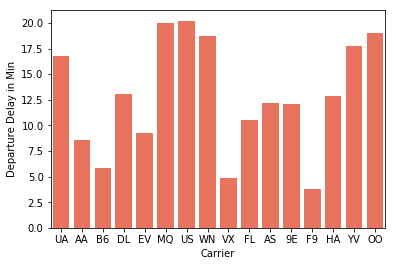

In [39]:
ax=sns.barplot(Carriers,Dep_dly_mean['dep_delay'],color='#FF6347',data=Dep_dly_mean)
ax.set(xlabel='Carrier', ylabel='Departure Delay in Min')
plt.show()

# Which Month is the most busiest month and highest delay

In [116]:
Months=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sept','Oct','Nov','Dec']
weeks=['Mon','Tues','Web','Thur','Fri','Sat','Sun']

In [41]:
bymonth=NYF_data.groupby('Month',as_index=False)

In [114]:
byweek=NYF_data.groupby('DayofWeek',as_index=False)

In [42]:
Busiest_mnt=bymonth['flight'].mean()

In [119]:
Busiest_day=byweek['flight'].sum()

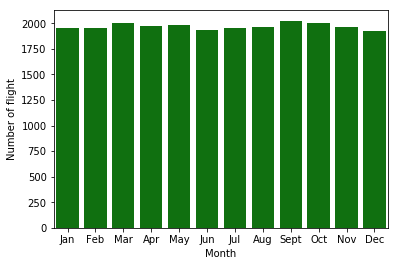

In [43]:
ax=sns.barplot(Months,Busiest_mnt['flight'],color='green',data=Busiest_mnt)
ax.set(xlabel='Month', ylabel='Number of flight')
plt.show()

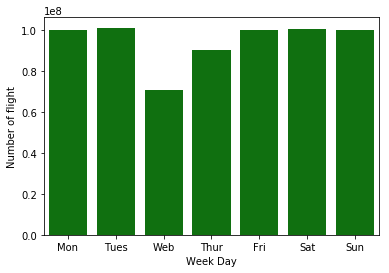

In [120]:
ax=sns.barplot(weeks,Busiest_day['flight'],color='green',data=Busiest_day)
ax.set(xlabel='Week Day', ylabel='Number of flight')
plt.show()

In [121]:
Busiest_day

,DayofWeek,flight
0,Friday,100247140
1,Monday,101250430
2,Saturday,71006261
3,Sunday,90518821
4,Thursday,99990143
5,Tuesday,100755391
6,Wednesday,100328363


In [44]:
Highest_delay=bymonth['dep_delay'].mean()

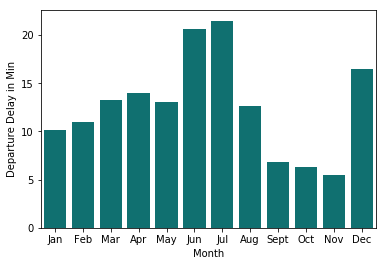

In [45]:
ax=sns.barplot(Months,Highest_delay['dep_delay'],color='teal',data=Highest_delay)
ax.set(xlabel='Month', ylabel='Departure Delay in Min')
plt.show()

In [46]:
carrier_grp = NYF_data.groupby(['carrier']).count()

In [47]:
Carriers_operation=pd.Series(carrier_grp['origin']).reset_index(name='Flight_Nos')
Carriers_operation

,carrier,Flight_Nos
0,9E,18460
1,AA,32729
2,AS,714
3,B6,54635
4,DL,48110
5,EV,54173
6,F9,685
7,FL,3260
8,HA,342
9,MQ,26397


In [48]:
Carriers_operation['angle'] = Carriers_operation['Flight_Nos']/Carriers_operation['Flight_Nos'].sum() * 2*pi
Carriers_operation['color'] = Category20c[len(Carriers_operation)]

In [49]:
Carriers_operation

,carrier,Flight_Nos,angle,color
0,9E,18460,0.344406,#3182bd
1,AA,32729,0.610621,#6baed6
2,AS,714,0.013321,#9ecae1
3,B6,54635,1.019318,#c6dbef
4,DL,48110,0.897582,#e6550d
5,EV,54173,1.010698,#fd8d3c
6,F9,685,0.012780,#fdae6b
7,FL,3260,0.060821,#fdd0a2
8,HA,342,0.006381,#31a354
9,MQ,26397,0.492485,#74c476


In [50]:
p = figure(plot_height=350, title="Most number of flight with respect to carrier", toolbar_location=None, tools="hover", x_range=(-0.5, 1.0))

In [51]:
p.wedge(x=0, y=1, radius=0.4,
        start_angle=cumsum('angle', include_zero=True), end_angle=cumsum('angle'),
        line_color="white", fill_color='color', legend='carrier', source=Carriers_operation)

p.axis.axis_label=None
p.axis.visible=False
p.grid.grid_line_color = None


In [52]:
show(p);

In [53]:
NYF_data.corr()

,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,flight,air_time,distance,hour,minute,Month
dep_time,1.000000,0.955672,0.258211,0.666349,0.787167,0.230353,0.049802,-0.019911,-0.019486,0.954351,0.091514,-0.005011
sched_dep_time,0.955672,1.000000,0.197427,0.648713,0.783342,0.172597,0.036495,-0.020519,-0.017995,0.999148,0.082960,-0.004573
dep_delay,0.258211,0.197427,1.000000,0.030099,0.159595,0.909897,0.056388,-0.022734,-0.022127,0.196747,0.028754,-0.019951
arr_time,0.666349,0.648713,0.030099,1.000000,0.793796,0.025285,0.033669,0.048636,0.041616,0.648656,0.041843,-0.003724
sched_arr_time,0.787167,0.783342,0.159595,0.793796,1.000000,0.132430,0.021594,0.073960,0.068726,0.783283,0.050321,-0.004173
arr_delay,0.230353,0.172597,0.909897,0.025285,0.132430,1.000000,0.074921,-0.036476,-0.062805,0.172148,0.021607,-0.017347
flight,0.049802,0.036495,0.056388,0.033669,0.021594,0.074921,1.000000,-0.475263,-0.484165,0.035838,0.018137,-0.000834
air_time,-0.019911,-0.020519,-0.022734,0.048636,0.073960,-0.036476,-0.475263,1.000000,0.990088,-0.021333,0.018375,0.012359
distance,-0.019486,-0.017995,-0.022127,0.041616,0.068726,-0.062805,-0.484165,0.990088,1.000000,-0.018860,0.019780,0.021636
hour,0.954351,0.999148,0.196747,0.648656,0.783283,0.172148,0.035838,-0.021333,-0.018860,1.000000,0.041768,-0.005227


In [57]:
NYF_data.head()

,Travel_Date,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,origin,dest,air_time,distance,hour,minute,time_hour,Month,Year
0,2013-01-01,517,515,2,830,819,11,UA,1545,EWR,IAH,227.0,1400,5,15,01-01-2013 05:00,1,2013
1,2013-01-01,533,529,4,850,830,20,UA,1714,LGA,IAH,227.0,1416,5,29,01-01-2013 05:00,1,2013
2,2013-01-01,542,540,2,923,850,33,AA,1141,JFK,MIA,160.0,1089,5,40,01-01-2013 05:00,1,2013
3,2013-01-01,544,545,-1,1004,1022,-18,B6,725,JFK,BQN,183.0,1576,5,45,01-01-2013 05:00,1,2013
4,2013-01-01,554,600,-6,812,837,-25,DL,461,LGA,ATL,116.0,762,6,0,01-01-2013 06:00,1,2013


In [108]:
flight=NYF_data[['carrier','origin','flight']]

In [109]:
flight=pd.pivot_table(flight,index=['carrier'],values='flight',columns='origin',aggfunc=np.sum)
flight

origin,EWR,JFK,LGA
carrier,,,
9E,4749476.0,51542354.0,9556055.0
AA,4740278.0,10432486.0,14806094.0
AS,8706.0,NaN,NaN
B6,5906285.0,26288946.0,4474028.0
DL,5325558.0,23164383.0,37651577.0
EV,195816198.0,8044064.0,46640137.0
F9,NaN,NaN,469385.0
FL,NaN,NaN,1651670.0
HA,NaN,17442.0,NaN


In [110]:
#fligh=fligh.dropna(how='any',axis=0)
flight=flight.fillna(0)
flight

origin,EWR,JFK,LGA
carrier,,,
9E,4749476.0,51542354.0,9556055.0
AA,4740278.0,10432486.0,14806094.0
AS,8706.0,0.0,0.0
B6,5906285.0,26288946.0,4474028.0
DL,5325558.0,23164383.0,37651577.0
EV,195816198.0,8044064.0,46640137.0
F9,0.0,0.0,469385.0
FL,0.0,0.0,1651670.0
HA,0.0,17442.0,0.0


In [103]:
pal = sns.dark_palette("palegreen", as_cmap=True)

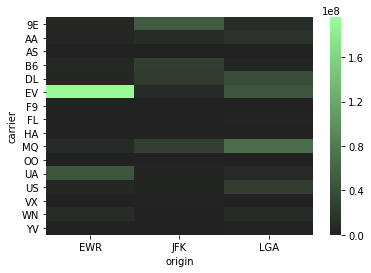

In [104]:
ax = sns.heatmap(fligh, cmap=pal)

In [112]:
NYF_data.head()

,Travel_Date,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,origin,dest,air_time,distance,hour,minute,time_hour,Month,Year,DayofWeek
0,2013-01-01,517,515,2,830,819,11,UA,1545,EWR,IAH,227.0,1400,5,15,01-01-2013 05:00,1,2013,Tuesday
1,2013-01-01,533,529,4,850,830,20,UA,1714,LGA,IAH,227.0,1416,5,29,01-01-2013 05:00,1,2013,Tuesday
2,2013-01-01,542,540,2,923,850,33,AA,1141,JFK,MIA,160.0,1089,5,40,01-01-2013 05:00,1,2013,Tuesday
3,2013-01-01,544,545,-1,1004,1022,-18,B6,725,JFK,BQN,183.0,1576,5,45,01-01-2013 05:00,1,2013,Tuesday
4,2013-01-01,554,600,-6,812,837,-25,DL,461,LGA,ATL,116.0,762,6,0,01-01-2013 06:00,1,2013,Tuesday
